## Импорт данных

In [130]:
import pandas as pd
import io
import requests
#!pip install pyarrow
#import pyarrow
 
url_test_submit_example = 'https://raw.githubusercontent.com/Yodiculta/Python_new/main/test_submit_example.csv'
content = requests.get(url_test_submit_example).content
test_submit_example = pd.read_csv(io.BytesIO(content), delimiter = ',')
test_submit_example


url_train_target = 'https://raw.githubusercontent.com/Yodiculta/Python_new/main/train_target.csv'
content = requests.get(url_train_target).content
train_target = pd.read_csv(io.BytesIO(content), delimiter = ',')
train_target


url_train_data = 'https://raw.githubusercontent.com/Yodiculta/Python_new/main/train.parquet'
content = requests.get(url_train_data).content
train_data = pd.read_parquet(io.BytesIO(content))
train_data


url_test_data = 'https://raw.githubusercontent.com/Yodiculta/Python_new/main/test.parquet'
content = requests.get(url_test_data).content
test_data = pd.read_parquet(io.BytesIO(content))
test_data

'''
df = pd.read_parquet('train.parquet');
df_test = pd.read_parquet('test.parquet');
y_target_train = pd.read_csv('train_target.csv');
'''

"\ndf = pd.read_parquet('train.parquet');\ndf_test = pd.read_parquet('test.parquet');\ny_target_train = pd.read_csv('train_target.csv');\n"

In [131]:
test_data

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange
0,0,1,258.0,30.6,29.2,29.7,30.2,29.4,29.1,28.2,29.5
1,0,1,2905.0,30.0,28.2,29.2,29.2,28.7,28.9,28.1,29.0
2,0,1,3885.0,29.8,28.6,29.3,29.1,28.5,28.7,27.9,28.6
3,0,1,4864.0,29.7,28.4,29.3,29.1,29.1,28.5,28.2,29.0
4,0,1,6225.0,30.6,29.1,29.4,29.2,29.1,28.7,27.9,28.3
...,...,...,...,...,...,...,...,...,...,...,...
209071,37429,4,32362.0,28.2,29.4,31.3,32.2,29.0,27.8,29.1,29.4
209072,37429,4,34150.0,28.4,29.4,31.4,32.1,28.8,27.6,29.3,28.9
209073,37429,4,34150.0,28.6,29.0,30.8,32.7,28.8,27.7,29.2,28.3
209074,37429,4,35942.0,27.9,28.7,31.0,32.1,28.0,27.3,29.1,27.7


## Импорт библиотек

In [2]:
#!pip install numpy
import numpy as np

#!pip install pandas
import pandas as pd

#!pip install pandas_datareader
import pandas_datareader.data as web

#!pip install IPython
from IPython.display import display

#подшрузка zip файлов
#!pip install zipfile
import zipfile

#Для расчет NPV IRR
!pip install numpy-financial 
import numpy_financial as npf

#!pip install yfinance
import yfinance as yf  

#Для даты время
#!pip install datetime 
import datetime

#Чтобы подключить файлы с диска
#from google.colab import drive
#drive.mount('/content/gdrive')

#графики
import plotly.express as px

#!pip install matplotlib
import matplotlib.pyplot as plt

#!pip install seaborn
import seaborn as sns

#!pip install pyarrow

#!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots;
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

## Аланиз и чистка данных

In [108]:
ts_id1 = train_data.groupby('wagnum').apply(lambda x: min(x['ts_id'])-  max(x['ts_id']))
ts_id1 = pd.DataFrame(ts_id1, columns = ['ts_id'])
ts_id1.sort_values('ts_id').head(3)
# в каких вагонах менялся ts_id

#df[df['wagnum']==6513]
#(train.milleage_all.max() -train.milleage_all.min())
#len(train_target.wagnum.unique())
#train_target[~train_target.wagnum.isin(train.wagnum)]
#train.wagnum.unique()

,ts_id
wagnum,
8769,-8
6167,-7
7792,-6


In [109]:
train_data[train_data.wagnum==6333]

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange
98971,6333,1,16670.0,28.6,27.9,29.8,29.9,28.2,28.4,31.7,32.2
98972,6333,1,16670.0,28.1,28.7,29.5,30.2,27.6,28.3,31.6,32.3
98973,6333,1,16670.0,28.0,28.2,29.1,29.3,27.1,28.4,31.1,32.2
98974,6333,1,16670.0,28.0,28.2,29.1,29.3,27.1,28.4,31.1,32.2
98975,6333,1,25056.0,27.6,27.6,30.7,28.4,27.1,27.2,31.4,30.9
98976,6333,1,31121.0,27.9,28.2,29.7,30.2,27.4,28.6,31.1,31.4
98977,6333,1,31886.0,27.5,27.3,29.5,29.0,27.5,28.3,30.9,31.3
98978,6333,1,30290.0,27.9,27.3,29.3,28.4,27.7,28.5,30.9,30.4
98979,6333,1,30290.0,27.9,28.1,29.6,29.1,27.3,28.4,31.0,30.8
98980,6333,1,36524.0,28.1,27.5,28.6,28.7,27.7,27.9,31.1,31.2


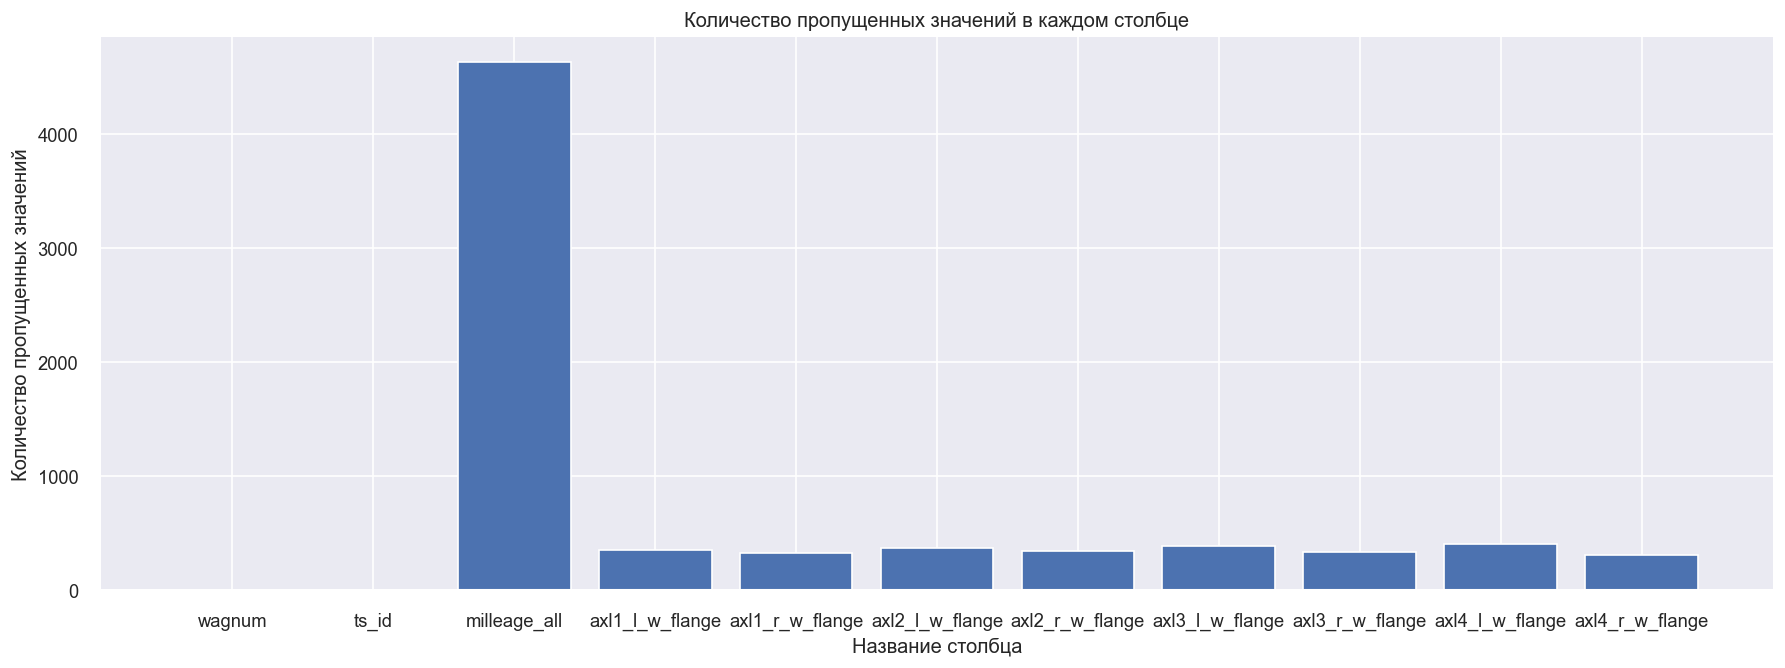

In [66]:
nan_counts = train_data.isna().sum()
plt.figure(figsize=(18,6))
plt.bar(nan_counts.index, nan_counts.values)
plt.title('Количество пропущенных значений в каждом столбце')
plt.xlabel('Название столбца')
plt.ylabel('Количество пропущенных значений')
plt.show()

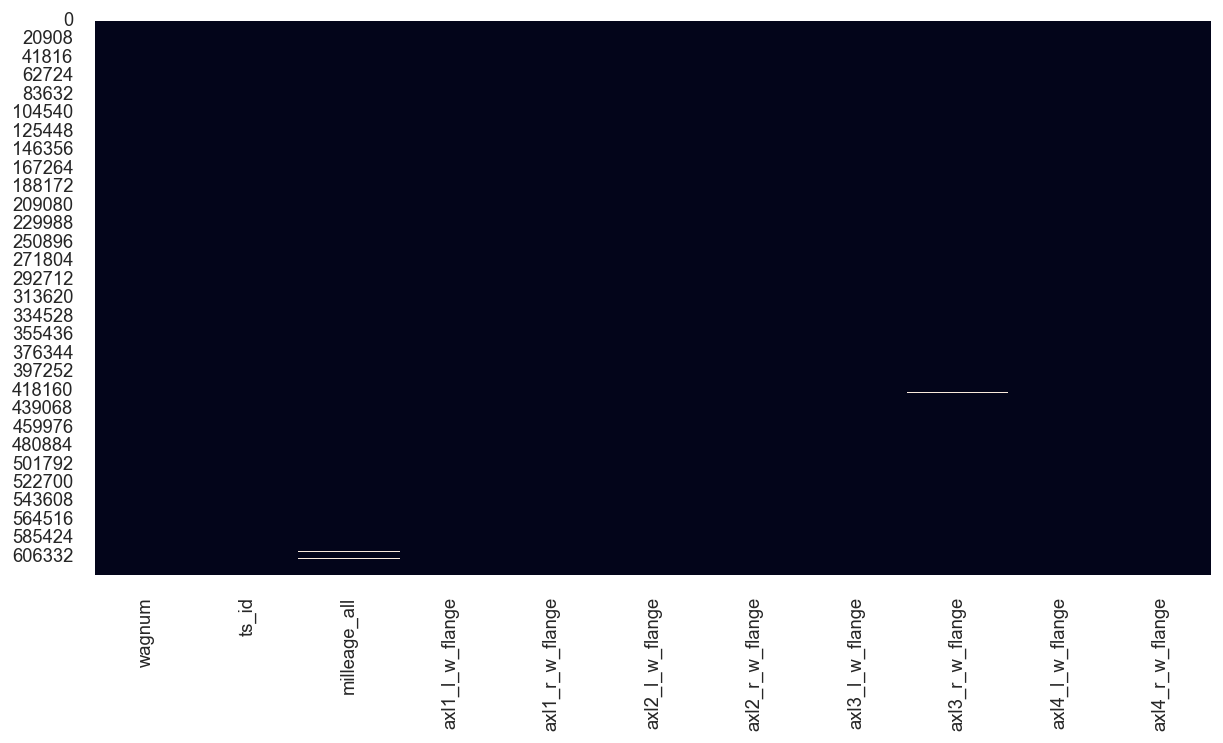

In [61]:
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 6)})
sns.heatmap(train_data.isnull(), cbar=False)
plt.show()

In [5]:
train_data = train_data.sort_values(['wagnum', 'ts_id', 'milleage_all']).bfill()
train_data[train_data.isna().any(axis=1)]
train_data[train_data.duplicated()]
train_data = train_data.drop_duplicates()
train_data.head(1)

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange
0,2,3,10371.0,28.6,29.7,28.6,28.8,30.4,29.3,29.9,28.3


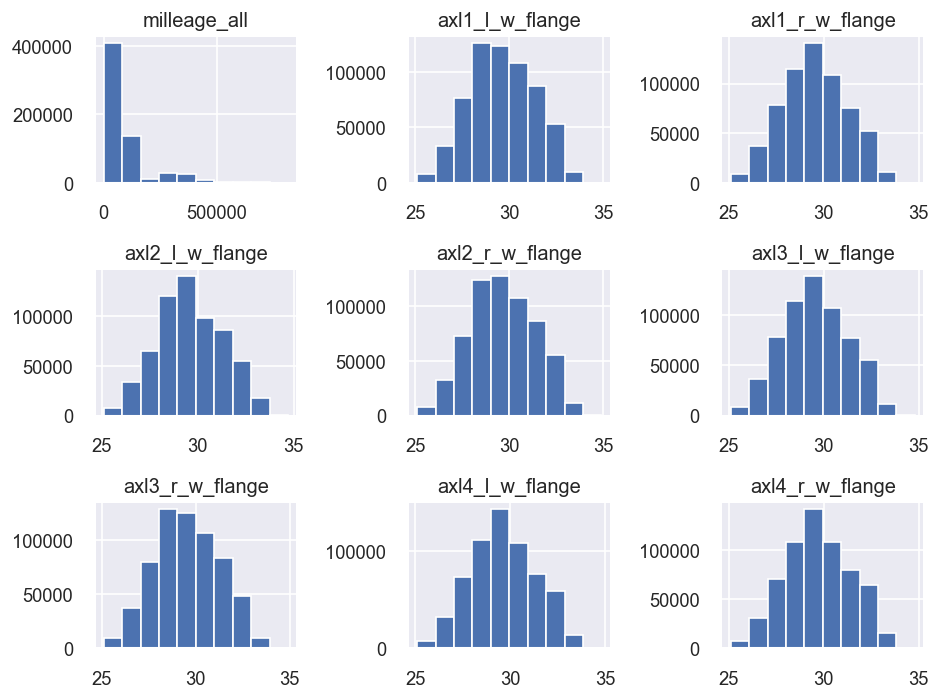

In [82]:
# построение гистограмм для каждого числового столбца
train_data.drop(['wagnum','ts_id'],axis=1).hist(figsize=(8,6))
plt.tight_layout()
plt.show()

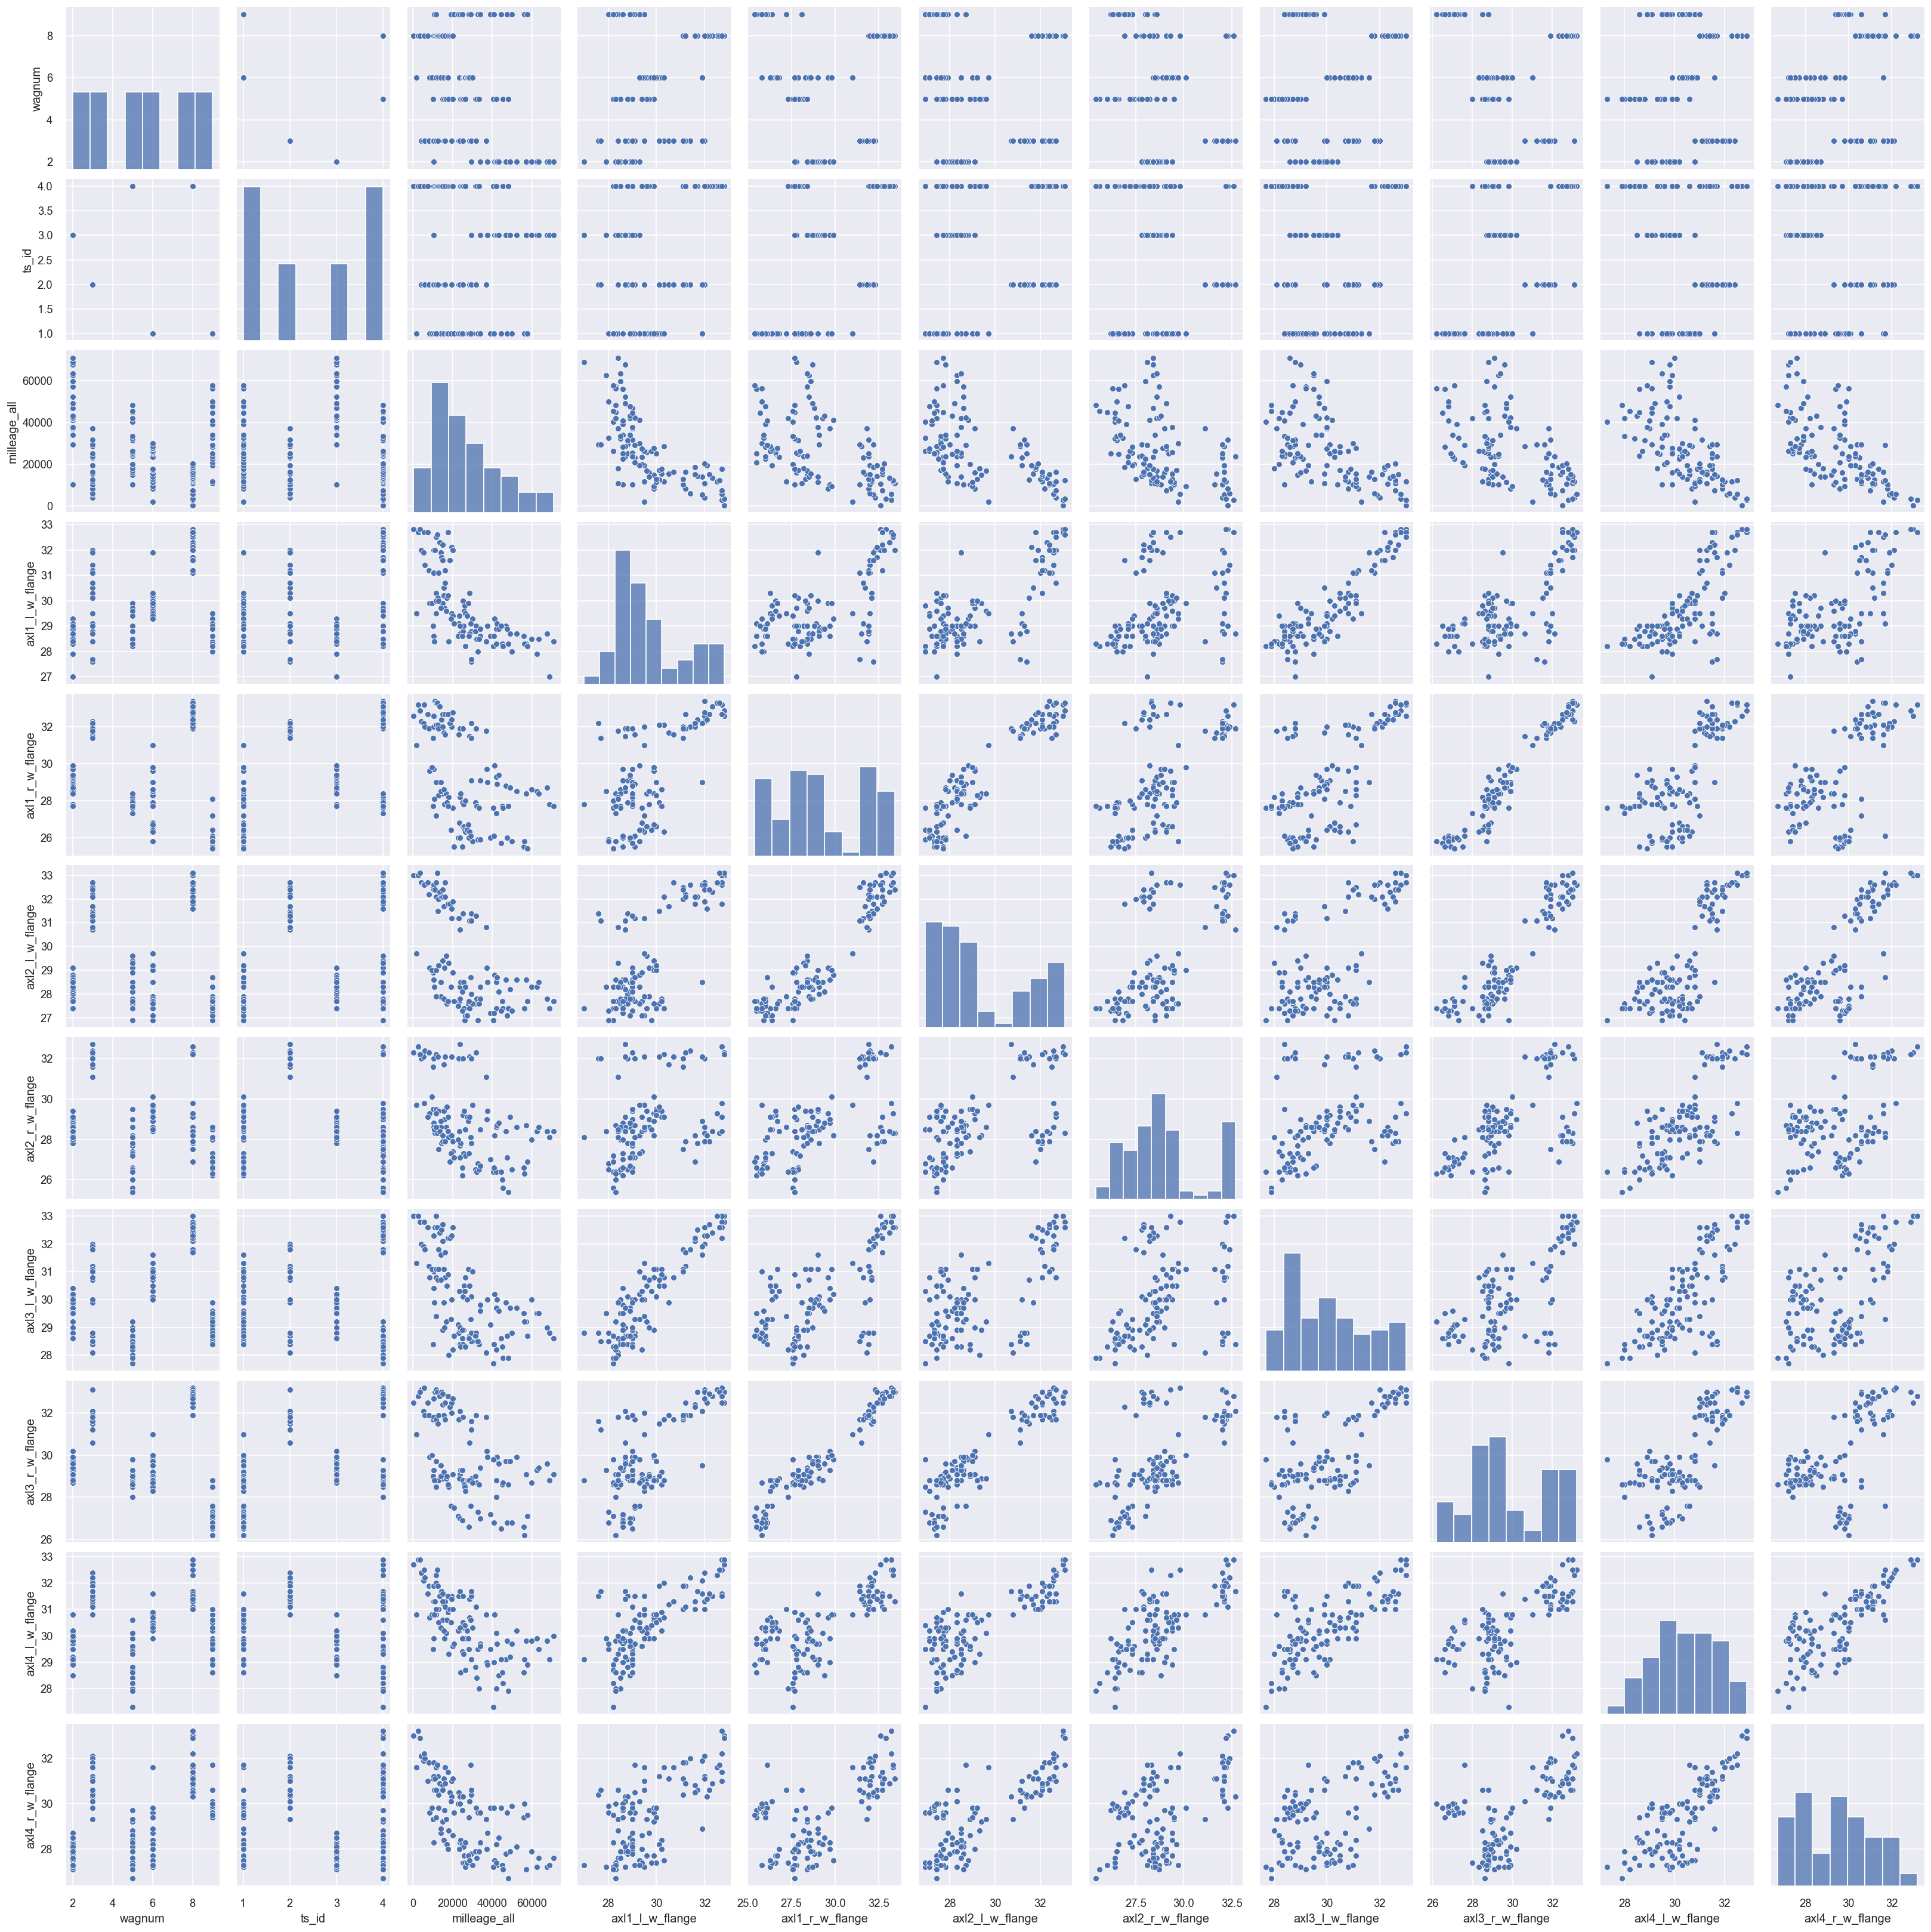

In [78]:
sns.pairplot(train_data[train_data['wagnum']<10])

In [6]:
# [train_data.milleage_all < 1000]['axl1_l_w_flange'].hist()

In [7]:
train_data.isna().sum()

wagnum             0
ts_id              0
milleage_all       0
axl1_l_w_flange    0
axl1_r_w_flange    0
axl2_l_w_flange    0
axl2_r_w_flange    0
axl3_l_w_flange    0
axl3_r_w_flange    0
axl4_l_w_flange    0
axl4_r_w_flange    0
dtype: int64

In [8]:
train_data_new = train_data.copy()
train_data_new['KP1'] = train_data_new['axl1_l_w_flange'] +train_data_new['axl1_r_w_flange']
train_data_new['KP2'] = train_data_new['axl2_l_w_flange'] +train_data_new['axl2_r_w_flange']
train_data_new['KP3'] = train_data_new['axl3_l_w_flange'] +train_data_new['axl3_r_w_flange']
train_data_new['KP4'] = train_data_new['axl4_l_w_flange'] +train_data_new['axl4_r_w_flange']
# train_data_new['KP1_km'] = train_data_new["KP1"] / train_data_new['milleage_all']


In [ ]:
train_data_new['KP1']

## Попытки подобрать фичи

In [39]:
# def test_mean(aa):
#     res =[np.nan]
#     for i in range(1, len(aa)):
#         res.append(aa[i-1] - aa[i])
#     res_s = pd.Series(res)
#     res_s = res_s.fillna(res_s.mean())
#     return np.mean(res_s)

# def test_mean2(aa):
#     res =[np.nan]
#     for i in range(1, len(aa)):
#         res.append(aa[i] - aa[i-1])
#     res_s = pd.Series(res)
#     res_s = res_s.fillna(res_s.mean())
#     return np.mean(res_s)

grouped = train_data_new.groupby(['wagnum', 'ts_id']).agg(
    Max_probeg=('milleage_all', 'max'),
    Avg_probeg=('milleage_all', 'mean'),
    Min_probeg=('milleage_all', 'min'),
#     probeg_diff=('milleage_all', lambda x: x.max() - x.min()),
    axl1_l_w_flange_diff=('axl1_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl1_r_w_flange_diff=('axl1_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl2_l_w_flange_diff=('axl2_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl2_r_w_flange_diff=('axl2_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl3_l_w_flange_diff=('axl3_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl3_r_w_flange_diff=('axl3_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl4_l_w_flange_diff=('axl4_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl4_r_w_flange_diff=('axl4_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl1_l_w_flange_min=('axl1_l_w_flange', 'min'),
    axl1_r_w_flange_min=('axl1_r_w_flange', 'min'),
    axl2_l_w_flange_min=('axl2_l_w_flange', 'min'),
    axl2_r_w_flange_min=('axl2_r_w_flange', 'min'),
    axl3_l_w_flange_min=('axl3_l_w_flange', 'min'),
    axl3_r_w_flange_min=('axl3_r_w_flange', 'min'),
    axl4_l_w_flange_min=('axl4_l_w_flange', 'min'),
    axl4_r_w_flange_min=('axl4_r_w_flange', 'min'),
#     axl1_l_w_flange_max=('axl1_l_w_flange', 'max'),
#     axl1_r_w_flange_max=('axl1_r_w_flange', 'max'),
#     axl2_l_w_flange_max=('axl2_l_w_flange', 'max'),
#     axl2_r_w_flange_max=('axl2_r_w_flange', 'max'),
#     axl3_l_w_flange_max=('axl3_l_w_flange', 'max'),
#     axl3_r_w_flange_max=('axl3_r_w_flange', 'max'),
#     axl4_l_w_flange_max=('axl4_l_w_flange', 'max'),
#     axl4_r_w_flange_max=('axl4_r_w_flange', 'max'),
    axl1_l_w_flange_mean=('axl1_l_w_flange', 'mean'),
    axl1_r_w_flange_mean=('axl1_r_w_flange', 'mean'),
    axl2_l_w_flange_mean=('axl2_l_w_flange', 'mean'),
    axl2_r_w_flange_mean=('axl2_r_w_flange', 'mean'),
    axl3_l_w_flange_mean=('axl3_l_w_flange', 'mean'),
    axl3_r_w_flange_mean=('axl3_r_w_flange', 'mean'),
    axl4_l_w_flange_mean=('axl4_l_w_flange', 'mean'),
    axl4_r_w_flange_mean=('axl4_r_w_flange', 'mean'),
    KP1_max = ('KP1', 'max'),
    KP2_max = ('KP2', 'max'),
    KP3_max = ('KP3', 'max'),
    KP4_max = ('KP4', 'max')
#     KP1_mean=('KP1', lambda a: test_mean(list(a))),
#     KP2_mean=('KP2', lambda a: test_mean(list(a))),
#     KP3_mean=('KP3', lambda a: test_mean(list(a))),
#     KP4_mean=('KP4', lambda a: test_mean(list(a))),
#     milleage_mean=('milleage_all', lambda a: test_mean2(list(a)))
    
)
# вывод результата

grouped = grouped.reset_index()
merged_df = grouped.merge(train_target, on=['wagnum', 'ts_id'] , how = 'inner', suffixes=('_target', ''))
merged_df

,wagnum,ts_id,Max_probeg,Avg_probeg,Min_probeg,axl1_l_w_flange_diff,axl1_r_w_flange_diff,axl2_l_w_flange_diff,axl2_r_w_flange_diff,axl3_l_w_flange_diff,...,axl2_r_w_flange_mean,axl3_l_w_flange_mean,axl3_r_w_flange_mean,axl4_l_w_flange_mean,axl4_r_w_flange_mean,KP1_max,KP2_max,KP3_max,KP4_max,target
0,2,3,70973.0,48215.157895,10371.0,0.2,2.0,0.9,0.4,1.8,...,28.552632,29.668421,29.426316,29.584211,27.805263,59.2,58.1,60.2,58.3,38958.0
1,3,2,37066.0,18275.736842,3983.0,3.6,0.5,1.9,0.9,3.9,...,32.042105,29.984211,31.789474,31.657895,30.973684,64.3,65.0,65.1,64.5,57253.0
2,5,4,48164.0,28330.315789,10245.0,0.7,0.0,1.5,4.1,0.5,...,27.189474,28.436842,28.873684,28.884211,28.173684,58.3,58.4,58.1,59.8,9734.0
3,6,1,30111.0,19096.157895,1821.0,0.2,5.2,2.1,0.0,0.3,...,29.178947,30.778947,29.100000,30.505263,28.421053,60.9,59.4,62.3,62.4,2604.0
4,8,4,20129.0,11969.263158,294.0,0.8,-0.2,1.1,4.4,0.4,...,28.926316,32.484211,32.715789,31.742105,31.336842,65.9,65.6,66.1,66.1,17272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33007,37430,4,28424.0,13266.947368,1786.0,0.0,2.0,1.4,0.5,0.3,...,31.994737,31.894737,31.389474,31.815789,32.021053,64.1,65.0,64.7,64.8,74694.0
33008,37431,3,51074.0,31437.157895,256.0,2.4,3.9,2.4,0.7,3.3,...,29.568421,27.315789,28.321053,26.247368,26.573684,61.8,59.2,60.0,55.8,25790.0
33009,37432,4,58962.0,35225.368421,15105.0,1.1,0.7,0.2,0.4,1.0,...,28.400000,26.326316,29.752632,26.873684,26.684211,59.9,57.9,58.1,55.5,10211.0
33010,37433,2,50678.0,25292.578947,2026.0,2.3,1.7,2.7,1.1,4.7,...,28.194737,26.947368,29.421053,29.494737,29.368421,63.0,60.4,61.3,62.1,7526.0


In [83]:
# # def test_mean(aa):
# #     res =[np.nan]
# #     for i in range(1, len(aa)):
# #         res.append(aa[i-1] - aa[i])
# #     res_s = pd.Series(res)
# #     res_s = res_s.fillna(res_s.mean())
# #     return np.mean(res_s)

# # def test_mean2(aa):
# #     res =[np.nan]
# #     for i in range(1, len(aa)):
# #         res.append(aa[i] - aa[i-1])
# #     res_s = pd.Series(res)
# #     res_s = res_s.fillna(res_s.mean())
# #     return np.mean(res_s)

# grouped = train_data_new.groupby(['wagnum', 'ts_id']).agg(
#     Max_probeg=('milleage_all', 'max'),
#     Avg_probeg=('milleage_all', 'mean'),
#     Min_probeg=('milleage_all', 'min'),
# #     probeg_diff=('milleage_all', lambda x: x.max() - x.min()),
#     axl1_l_w_flange_diff=('axl1_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl1_r_w_flange_diff=('axl1_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl2_l_w_flange_diff=('axl2_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl2_r_w_flange_diff=('axl2_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl3_l_w_flange_diff=('axl3_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl3_r_w_flange_diff=('axl3_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl4_l_w_flange_diff=('axl4_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl4_r_w_flange_diff=('axl4_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl1_l_w_flange_min=('axl1_l_w_flange', 'min'),
#     axl1_r_w_flange_min=('axl1_r_w_flange', 'min'),
#     axl2_l_w_flange_min=('axl2_l_w_flange', 'min'),
#     axl2_r_w_flange_min=('axl2_r_w_flange', 'min'),
#     axl3_l_w_flange_min=('axl3_l_w_flange', 'min'),
#     axl3_r_w_flange_min=('axl3_r_w_flange', 'min'),
#     axl4_l_w_flange_min=('axl4_l_w_flange', 'min'),
#     axl4_r_w_flange_min=('axl4_r_w_flange', 'min'),
# #     axl1_l_w_flange_max=('axl1_l_w_flange', 'max'),
# #     axl1_r_w_flange_max=('axl1_r_w_flange', 'max'),
# #     axl2_l_w_flange_max=('axl2_l_w_flange', 'max'),
# #     axl2_r_w_flange_max=('axl2_r_w_flange', 'max'),
# #     axl3_l_w_flange_max=('axl3_l_w_flange', 'max'),
# #     axl3_r_w_flange_max=('axl3_r_w_flange', 'max'),
# #     axl4_l_w_flange_max=('axl4_l_w_flange', 'max'),
# #     axl4_r_w_flange_max=('axl4_r_w_flange', 'max'),
#     axl1_l_w_flange_mean=('axl1_l_w_flange', 'mean'),
#     axl1_r_w_flange_mean=('axl1_r_w_flange', 'mean'),
#     axl2_l_w_flange_mean=('axl2_l_w_flange', 'mean'),
#     axl2_r_w_flange_mean=('axl2_r_w_flange', 'mean'),
#     axl3_l_w_flange_mean=('axl3_l_w_flange', 'mean'),
#     axl3_r_w_flange_mean=('axl3_r_w_flange', 'mean'),
#     axl4_l_w_flange_mean=('axl4_l_w_flange', 'mean'),
#     axl4_r_w_flange_mean=('axl4_r_w_flange', 'mean'),
#     KP1_max = ('KP1', 'max'),
#     KP2_max = ('KP2', 'max'),
#     KP3_max = ('KP3', 'max'),
#     KP4_max = ('KP4', 'max')
# #     KP1_mean=('KP1', lambda a: test_mean(list(a))),
# #     KP2_mean=('KP2', lambda a: test_mean(list(a))),
# #     KP3_mean=('KP3', lambda a: test_mean(list(a))),
# #     KP4_mean=('KP4', lambda a: test_mean(list(a))),
# #     milleage_mean=('milleage_all', lambda a: test_mean2(list(a)))
    
# )
# # вывод результата

# grouped = grouped.reset_index()
# merged_df = grouped.merge(train_target, on=['wagnum', 'ts_id'] , how = 'inner', suffixes=('_target', ''))
# merged_df

,wagnum,ts_id,Max_probeg,Avg_probeg,Min_probeg,axl1_l_w_flange_diff,axl1_r_w_flange_diff,axl2_l_w_flange_diff,axl2_r_w_flange_diff,axl3_l_w_flange_diff,...,axl2_r_w_flange_mean,axl3_l_w_flange_mean,axl3_r_w_flange_mean,axl4_l_w_flange_mean,axl4_r_w_flange_mean,KP1_max,KP2_max,KP3_max,KP4_max,target
0,2,3,70973.0,48215.157895,10371.0,0.2,2.0,0.9,0.4,1.8,...,28.552632,29.668421,29.426316,29.584211,27.805263,59.2,58.1,60.2,58.3,38958.0
1,3,2,37066.0,18275.736842,3983.0,3.6,0.5,1.9,0.9,3.9,...,32.042105,29.984211,31.789474,31.657895,30.973684,64.3,65.0,65.1,64.5,57253.0
2,5,4,48164.0,28330.315789,10245.0,0.7,0.0,1.5,4.1,0.5,...,27.189474,28.436842,28.873684,28.884211,28.173684,58.3,58.4,58.1,59.8,9734.0
3,6,1,30111.0,19096.157895,1821.0,0.2,5.2,2.1,0.0,0.3,...,29.178947,30.778947,29.100000,30.505263,28.421053,60.9,59.4,62.3,62.4,2604.0
4,8,4,20129.0,11969.263158,294.0,0.8,-0.2,1.1,4.4,0.4,...,28.926316,32.484211,32.715789,31.742105,31.336842,65.9,65.6,66.1,66.1,17272.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33007,37430,4,28424.0,13266.947368,1786.0,0.0,2.0,1.4,0.5,0.3,...,31.994737,31.894737,31.389474,31.815789,32.021053,64.1,65.0,64.7,64.8,74694.0
33008,37431,3,51074.0,31437.157895,256.0,2.4,3.9,2.4,0.7,3.3,...,29.568421,27.315789,28.321053,26.247368,26.573684,61.8,59.2,60.0,55.8,25790.0
33009,37432,4,58962.0,35225.368421,15105.0,1.1,0.7,0.2,0.4,1.0,...,28.400000,26.326316,29.752632,26.873684,26.684211,59.9,57.9,58.1,55.5,10211.0
33010,37433,2,50678.0,25292.578947,2026.0,2.3,1.7,2.7,1.1,4.7,...,28.194737,26.947368,29.421053,29.494737,29.368421,63.0,60.4,61.3,62.1,7526.0


In [ ]:
# grouped = train_data.groupby(['wagnum', 'ts_id']).agg(
#     Max_probeg=('milleage_all', 'max'),
#     Avg_probeg=('milleage_all', 'mean'),
#     Min_probeg=('milleage_all', 'min'),
#     probeg_diff=('milleage_all', lambda x: x.max() - x.min()),
#     axl1_l_w_flange_diff=('axl1_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl1_r_w_flange_diff=('axl1_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl2_l_w_flange_diff=('axl2_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl2_r_w_flange_diff=('axl2_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl3_l_w_flange_diff=('axl3_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl3_r_w_flange_diff=('axl3_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl4_l_w_flange_diff=('axl4_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl4_r_w_flange_diff=('axl4_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
#     axl1_l_w_3th_mean = ('axl1_l_w_flange', lambda x: np.mean(x.iloc[0:2])),
#     axl1_l_w_19th_mean = ('axl1_l_w_flange', lambda x: np.mean(x.iloc[17:])),
    
    
# )
# # вывод результата

# grouped = grouped.reset_index()
# merged_df = grouped.merge(train_target, on=['wagnum', 'ts_id'] , how = 'inner', suffixes=('_target', ''))
# merged_df

In [ ]:
merged_df['new_diff'] = merged_df['axl1_l_w_3th_mean']-merged_df['axl1_l_w_19th_mean']
merged_df

In [ ]:
merged_df['new_diff'].hist()

In [ ]:
merged_df[merged_df['probeg_diff']>20000]['target'].hist(bins=20)

In [ ]:
merged_df['1km_1_l_w'] = (merged_df['axl1_l_w_flange_diff']/ merged_df['probeg_diff'])*100
merged_df['1km_1_r_w'] = (merged_df['axl1_r_w_flange_diff']/ merged_df['probeg_diff'])*100
merged_df['1km_2_l_w'] = (merged_df['axl2_l_w_flange_diff']/ merged_df['probeg_diff'])*100
merged_df['1km_2_r_w'] = (merged_df['axl2_r_w_flange_diff']/ merged_df['probeg_diff'])*100
merged_df['1km_3_l_w'] = (merged_df['axl3_l_w_flange_diff']/ merged_df['probeg_diff'])*100
merged_df['1km_3_r_w'] = (merged_df['axl3_r_w_flange_diff']/ merged_df['probeg_diff'])*100
merged_df['1km_4_l_w'] = (merged_df['axl4_l_w_flange_diff']/ merged_df['probeg_diff'])*100
merged_df['1km_4_r_w'] = (merged_df['axl4_r_w_flange_diff']/ merged_df['probeg_diff'])*100

In [ ]:
merged_df2= merged_df[merged_df['ts_id']==2]

In [ ]:
merged_df2[merged_df2['Min_probeg']>500000]

In [ ]:
plt.scatter(merged_df2['target'], merged_df2['new_diff'], c=merged_df2['ts_id'], alpha =0.3)

# добавление подписей осей
plt.xlabel('Target')
plt.ylabel('Min_probeg')

In [ ]:
merged_df['target'].hist(bins=30)
merged_df[merged_df['target']>200000]

In [23]:
merged_df['KP1_for_1KM'] = merged_df['KP1_mean']/merged_df['milleage_mean']
merged_df['KP2_for_1KM'] = merged_df['KP2_mean']/merged_df['milleage_mean']
merged_df['KP3_for_1KM'] = merged_df['KP3_mean']/merged_df['milleage_mean']
merged_df['KP4_for_1KM'] = merged_df['KP4_mean']/merged_df['milleage_mean']

In [ ]:
# merged_df = merged_df.drop(['Max_probeg','Avg_probeg'],axis=1)

Text(0, 0.5, 'Толщина 1ой колесной пары')

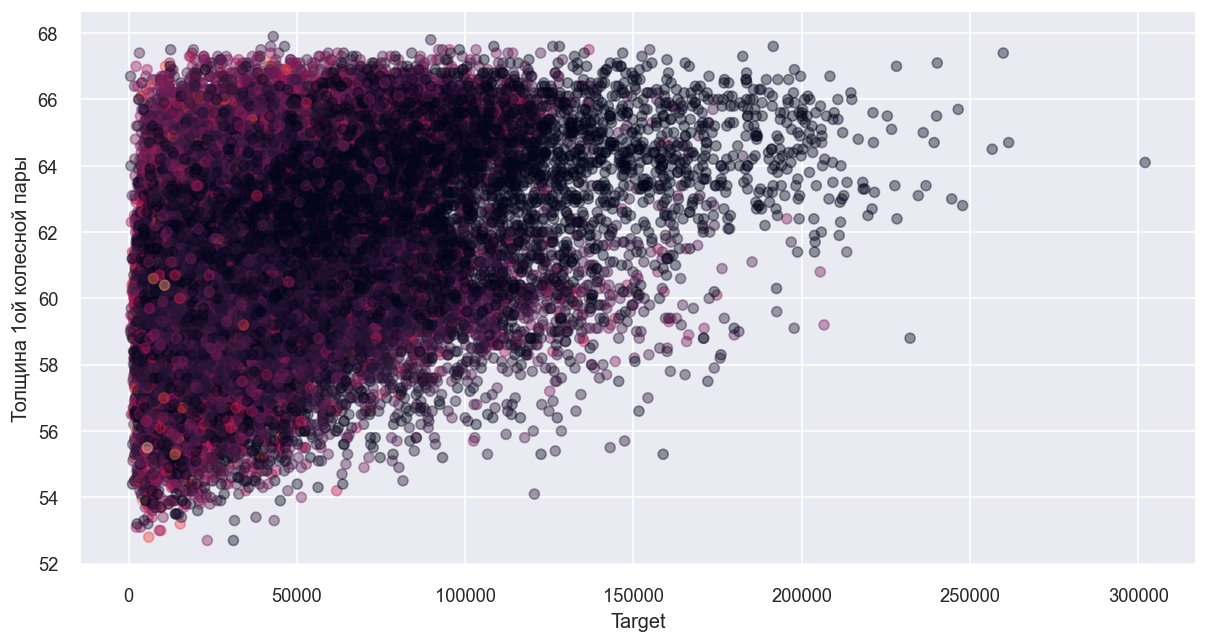

In [89]:
merged_df
plt.scatter(merged_df['target'], merged_df['KP1_max'], c=merged_df['ts_id'], alpha =0.4)#, cmap='viridis')

# добавление подписей осей
plt.xlabel('Target')
plt.ylabel('Толщина 1ой колесной пары')

In [97]:
sns.pairplot(data = merged_df[:100])

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001DD5A670670> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001DD6DCEEE50> (for post_execute):


KeyboardInterrupt: 

In [98]:
catboost.__version__

NameError: name 'catboost' is not defined

In [ ]:
sns.pairplot(data = merged_df)

Text(0, 0.5, 'Толщина 1ой колесной пары')

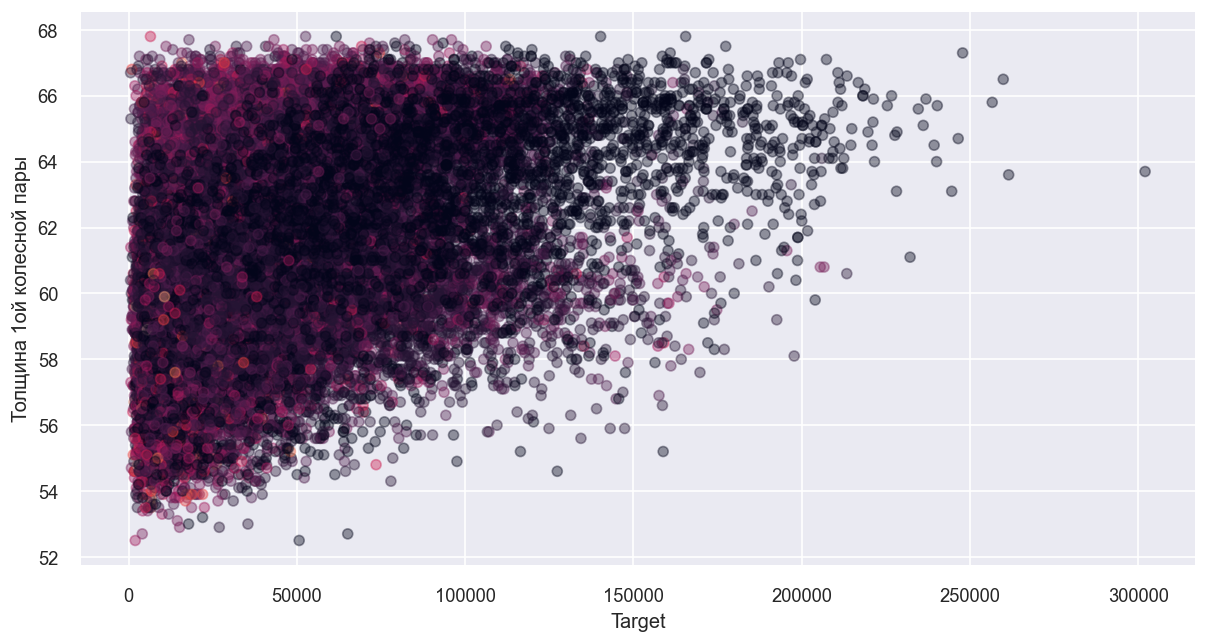

In [91]:
merged_df
plt.scatter(merged_df['target'], merged_df['KP2_max'], c=merged_df['ts_id'], alpha =0.4)#, cmap='viridis')

# добавление подписей осей
plt.xlabel('Target')
plt.ylabel('Толщина 1ой колесной пары')

In [40]:
X = merged_df.drop(['target'],  axis=1)
y = merged_df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train

,wagnum,ts_id,Max_probeg,Avg_probeg,Min_probeg,axl1_l_w_flange_diff,axl1_r_w_flange_diff,axl2_l_w_flange_diff,axl2_r_w_flange_diff,axl3_l_w_flange_diff,...,axl2_l_w_flange_mean,axl2_r_w_flange_mean,axl3_l_w_flange_mean,axl3_r_w_flange_mean,axl4_l_w_flange_mean,axl4_r_w_flange_mean,KP1_max,KP2_max,KP3_max,KP4_max
22152,25498,3,31186.0,16645.526316,616.0,1.2,1.8,1.1,0.8,-0.3,...,31.536842,31.468421,31.884211,30.494737,31.868421,31.068421,59.9,64.5,65.6,64.0
28539,32445,4,417852.0,402178.947368,386450.0,0.6,0.9,-0.5,-0.3,2.0,...,29.000000,29.578947,29.105263,29.973684,27.594737,29.342105,63.1,60.5,61.5,58.7
21005,24207,3,72914.0,61554.315789,52105.0,-1.4,5.1,0.7,2.6,1.3,...,30.531579,29.078947,27.636842,26.389474,28.173684,27.657895,60.0,61.8,56.1,56.9
7132,8519,3,31069.0,17161.684211,2257.0,2.2,1.9,1.8,3.5,1.3,...,29.473684,29.694737,28.584211,30.352632,29.842105,30.936842,62.2,62.1,60.4,62.6
32360,36647,1,39494.0,23124.000000,5095.0,1.8,0.8,1.9,1.4,2.0,...,32.084211,32.978947,32.652632,33.294737,30.921053,31.910526,66.3,67.0,67.3,65.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,9433,2,34179.0,19547.947368,628.0,0.2,0.7,-1.0,0.5,0.7,...,30.868421,29.710526,31.736842,31.810526,29.784211,32.200000,64.3,61.9,64.7,63.4
7941,9402,3,33631.0,21204.947368,5969.0,-0.4,-1.3,-1.1,0.3,-0.5,...,32.078947,31.878947,31.073684,30.247368,31.605263,32.473684,63.4,64.8,62.3,65.2
8359,9854,4,65733.0,23326.368421,572.0,4.0,2.0,0.4,1.1,-0.6,...,32.731579,32.810526,32.394737,29.105263,31.321053,33.289474,67.3,66.9,66.2,66.7
28729,32637,2,311260.0,298187.105263,286550.0,0.6,0.3,0.8,0.3,0.6,...,31.600000,31.242105,31.047368,31.800000,31.010526,31.457895,62.8,64.3,63.9,63.4


In [ ]:
# !pip install autoviz
!pip install --pre pycaret



In [ ]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from autoviz.classify_method import data_cleaning_suggestions ,data_suggestions
from pycaret import regression


data_cleaning_suggestions(train_data)





In [46]:
from pycaret.regression import *
setup(X,target=y ,session_id=42,train_size= 0.8)




,Description,Value
0,Session id,42
1,Target,target
2,Target type,Regression
3,Original data shape,"(33012, 34)"
4,Transformed data shape,"(33012, 34)"
5,Transformed train set shape,"(26409, 34)"
6,Transformed test set shape,"(6603, 34)"
7,Numeric features,33
8,Preprocess,True
9,Imputation type,simple


In [47]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,16746.1129,526981860.2469,22946.3296,0.5994,0.6547,0.7016,3.6850
lightgbm,Light Gradient Boosting Machine,16678.0167,528712676.7479,22983.6440,0.5981,0.6225,0.6948,0.4180
et,Extra Trees Regressor,17300.2303,550303023.8493,23447.9513,0.5816,0.6654,0.8040,3.2160
xgboost,Extreme Gradient Boosting,17329.5287,562429436.8000,23707.3711,0.5723,0.7064,0.7391,1.1880
rf,Random Forest Regressor,17378.8337,562870628.3692,23714.1359,0.5721,0.6605,0.7870,7.9750
gbr,Gradient Boosting Regressor,18224.2175,604421220.8176,24572.4059,0.5406,0.7205,0.8247,2.1590
ridge,Ridge Regression,21774.6367,830272240.2548,28802.6012,0.3689,0.8405,1.0845,0.1670
lasso,Lasso Regression,21774.5859,830262781.9993,28802.4329,0.3689,0.8404,1.0845,0.6900
lr,Linear Regression,21774.6410,830273017.9906,28802.6151,0.3689,0.8405,1.0845,0.9610
br,Bayesian Ridge,21776.3346,830213980.9666,28801.4726,0.3689,0.8395,1.0851,0.1970


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best_model = compare_models()

# Получение параметров лучшей модели
best_model_params = best_model.get_params()

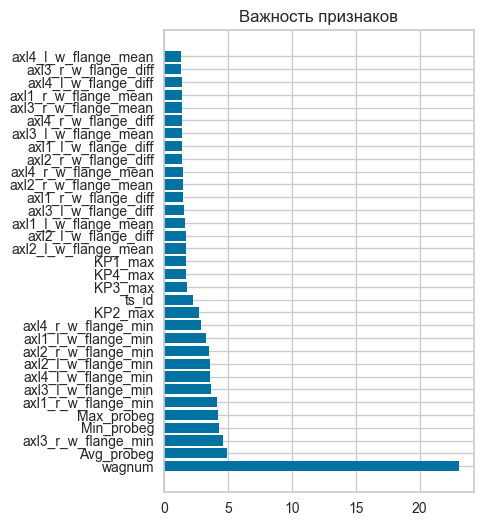

In [52]:
importance = np.sort(pipeline['regressor'].feature_importances_)
importance_name = np.argsort(pipeline['regressor'].feature_importances_)
feature_names = X_train.columns

plt.figure(figsize=(4, 6))
plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

In [86]:
from catboost import CatBoostRegressor
# model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_seed=42)
# model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', CatBoostRegressor(iterations=2000, learning_rate=0.01, depth=11, loss_function='MAE', random_seed=42))
])

pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = pipeline.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

0:	learn: 27015.4384047	total: 112ms	remaining: 3m 43s
1:	learn: 26864.7989651	total: 222ms	remaining: 3m 41s
2:	learn: 26725.1345475	total: 341ms	remaining: 3m 47s
3:	learn: 26590.1955982	total: 456ms	remaining: 3m 47s
4:	learn: 26452.3957826	total: 572ms	remaining: 3m 48s
5:	learn: 26311.6704673	total: 685ms	remaining: 3m 47s
6:	learn: 26182.0293974	total: 801ms	remaining: 3m 48s
7:	learn: 26060.6965770	total: 915ms	remaining: 3m 47s
8:	learn: 25930.1963366	total: 1.02s	remaining: 3m 46s
9:	learn: 25804.3684326	total: 1.13s	remaining: 3m 45s
10:	learn: 25680.7029663	total: 1.25s	remaining: 3m 45s
11:	learn: 25562.6830219	total: 1.36s	remaining: 3m 46s
12:	learn: 25441.6335992	total: 1.48s	remaining: 3m 45s
13:	learn: 25324.9899603	total: 1.59s	remaining: 3m 45s
14:	learn: 25204.3793522	total: 1.71s	remaining: 3m 45s
15:	learn: 25089.9698690	total: 1.82s	remaining: 3m 45s
16:	learn: 24979.4476466	total: 1.94s	remaining: 3m 46s
17:	learn: 24867.4360044	total: 2.06s	remaining: 3m 46s
18

148:	learn: 18240.7798219	total: 17.7s	remaining: 3m 40s
149:	learn: 18222.9118312	total: 17.9s	remaining: 3m 40s
150:	learn: 18202.9033926	total: 18s	remaining: 3m 40s
151:	learn: 18183.6995191	total: 18.1s	remaining: 3m 40s
152:	learn: 18164.8549215	total: 18.2s	remaining: 3m 40s
153:	learn: 18146.3727581	total: 18.4s	remaining: 3m 40s
154:	learn: 18126.8029761	total: 18.5s	remaining: 3m 40s
155:	learn: 18110.8771571	total: 18.6s	remaining: 3m 40s
156:	learn: 18095.6945918	total: 18.7s	remaining: 3m 40s
157:	learn: 18079.0244479	total: 18.9s	remaining: 3m 40s
158:	learn: 18060.3471221	total: 19s	remaining: 3m 40s
159:	learn: 18043.7066223	total: 19.1s	remaining: 3m 40s
160:	learn: 18028.7283307	total: 19.3s	remaining: 3m 40s
161:	learn: 18013.2246015	total: 19.4s	remaining: 3m 40s
162:	learn: 17998.0303880	total: 19.5s	remaining: 3m 39s
163:	learn: 17983.1059877	total: 19.6s	remaining: 3m 39s
164:	learn: 17967.1589331	total: 19.8s	remaining: 3m 39s
165:	learn: 17951.1603357	total: 19

294:	learn: 16790.0117980	total: 35.2s	remaining: 3m 23s
295:	learn: 16785.3178617	total: 35.3s	remaining: 3m 23s
296:	learn: 16780.5773594	total: 35.4s	remaining: 3m 22s
297:	learn: 16774.8367638	total: 35.5s	remaining: 3m 22s
298:	learn: 16771.1287579	total: 35.7s	remaining: 3m 22s
299:	learn: 16766.4572758	total: 35.8s	remaining: 3m 22s
300:	learn: 16762.6726795	total: 35.9s	remaining: 3m 22s
301:	learn: 16757.1658966	total: 36s	remaining: 3m 22s
302:	learn: 16752.4742411	total: 36.1s	remaining: 3m 22s
303:	learn: 16746.9316614	total: 36.2s	remaining: 3m 22s
304:	learn: 16742.9082576	total: 36.3s	remaining: 3m 21s
305:	learn: 16740.0142373	total: 36.4s	remaining: 3m 21s
306:	learn: 16735.4855526	total: 36.5s	remaining: 3m 21s
307:	learn: 16729.0556921	total: 36.7s	remaining: 3m 21s
308:	learn: 16724.3908407	total: 36.8s	remaining: 3m 21s
309:	learn: 16719.4912261	total: 36.9s	remaining: 3m 21s
310:	learn: 16713.5984305	total: 37s	remaining: 3m 20s
311:	learn: 16709.3312657	total: 37

440:	learn: 16138.2665769	total: 51.8s	remaining: 3m 2s
441:	learn: 16133.6387466	total: 51.9s	remaining: 3m 2s
442:	learn: 16130.8991723	total: 52s	remaining: 3m 2s
443:	learn: 16128.6437074	total: 52.1s	remaining: 3m 2s
444:	learn: 16125.1910957	total: 52.2s	remaining: 3m 2s
445:	learn: 16119.5206749	total: 52.3s	remaining: 3m 2s
446:	learn: 16116.0622984	total: 52.4s	remaining: 3m 2s
447:	learn: 16114.4648021	total: 52.5s	remaining: 3m 1s
448:	learn: 16111.8492539	total: 52.6s	remaining: 3m 1s
449:	learn: 16108.5640719	total: 52.7s	remaining: 3m 1s
450:	learn: 16104.8653993	total: 52.9s	remaining: 3m 1s
451:	learn: 16101.3011281	total: 53s	remaining: 3m 1s
452:	learn: 16097.7042878	total: 53.1s	remaining: 3m 1s
453:	learn: 16095.5871849	total: 53.2s	remaining: 3m 1s
454:	learn: 16091.7160131	total: 53.3s	remaining: 3m
455:	learn: 16089.1861156	total: 53.4s	remaining: 3m
456:	learn: 16084.3334186	total: 53.5s	remaining: 3m
457:	learn: 16079.5936843	total: 53.6s	remaining: 3m
458:	lea

586:	learn: 15638.9385253	total: 1m 8s	remaining: 2m 44s
587:	learn: 15635.8754432	total: 1m 8s	remaining: 2m 44s
588:	learn: 15631.6238612	total: 1m 8s	remaining: 2m 43s
589:	learn: 15627.5433152	total: 1m 8s	remaining: 2m 43s
590:	learn: 15623.9701094	total: 1m 8s	remaining: 2m 43s
591:	learn: 15620.1457281	total: 1m 8s	remaining: 2m 43s
592:	learn: 15618.0302423	total: 1m 8s	remaining: 2m 43s
593:	learn: 15616.0558643	total: 1m 8s	remaining: 2m 43s
594:	learn: 15611.3862698	total: 1m 9s	remaining: 2m 43s
595:	learn: 15608.5438544	total: 1m 9s	remaining: 2m 43s
596:	learn: 15605.8087585	total: 1m 9s	remaining: 2m 42s
597:	learn: 15600.8347523	total: 1m 9s	remaining: 2m 42s
598:	learn: 15597.5278574	total: 1m 9s	remaining: 2m 42s
599:	learn: 15595.7333832	total: 1m 9s	remaining: 2m 42s
600:	learn: 15592.8278645	total: 1m 9s	remaining: 2m 42s
601:	learn: 15588.1058390	total: 1m 9s	remaining: 2m 42s
602:	learn: 15584.7238947	total: 1m 9s	remaining: 2m 42s
603:	learn: 15583.7448982	total

728:	learn: 15176.0618782	total: 1m 24s	remaining: 2m 27s
729:	learn: 15174.6364794	total: 1m 24s	remaining: 2m 27s
730:	learn: 15172.7987566	total: 1m 24s	remaining: 2m 27s
731:	learn: 15169.1138636	total: 1m 24s	remaining: 2m 26s
732:	learn: 15167.3700767	total: 1m 24s	remaining: 2m 26s
733:	learn: 15165.3291634	total: 1m 25s	remaining: 2m 26s
734:	learn: 15164.1197341	total: 1m 25s	remaining: 2m 26s
735:	learn: 15162.1974613	total: 1m 25s	remaining: 2m 26s
736:	learn: 15157.7234490	total: 1m 25s	remaining: 2m 26s
737:	learn: 15155.3310218	total: 1m 25s	remaining: 2m 26s
738:	learn: 15149.8578832	total: 1m 25s	remaining: 2m 26s
739:	learn: 15147.1822381	total: 1m 25s	remaining: 2m 26s
740:	learn: 15144.9663308	total: 1m 25s	remaining: 2m 25s
741:	learn: 15139.9747563	total: 1m 25s	remaining: 2m 25s
742:	learn: 15138.3186019	total: 1m 26s	remaining: 2m 25s
743:	learn: 15134.8059301	total: 1m 26s	remaining: 2m 25s
744:	learn: 15133.1472867	total: 1m 26s	remaining: 2m 25s
745:	learn: 15

870:	learn: 14757.2214063	total: 1m 40s	remaining: 2m 10s
871:	learn: 14755.6350401	total: 1m 40s	remaining: 2m 10s
872:	learn: 14751.3051732	total: 1m 40s	remaining: 2m 10s
873:	learn: 14747.3501573	total: 1m 41s	remaining: 2m 10s
874:	learn: 14742.2319420	total: 1m 41s	remaining: 2m 10s
875:	learn: 14737.4305219	total: 1m 41s	remaining: 2m 9s
876:	learn: 14731.1204563	total: 1m 41s	remaining: 2m 9s
877:	learn: 14729.0111824	total: 1m 41s	remaining: 2m 9s
878:	learn: 14725.0921195	total: 1m 41s	remaining: 2m 9s
879:	learn: 14723.3469756	total: 1m 41s	remaining: 2m 9s
880:	learn: 14722.6076378	total: 1m 41s	remaining: 2m 9s
881:	learn: 14717.8002927	total: 1m 41s	remaining: 2m 9s
882:	learn: 14715.4954553	total: 1m 42s	remaining: 2m 9s
883:	learn: 14710.9225000	total: 1m 42s	remaining: 2m 9s
884:	learn: 14708.1708751	total: 1m 42s	remaining: 2m 8s
885:	learn: 14705.6019555	total: 1m 42s	remaining: 2m 8s
886:	learn: 14704.0131629	total: 1m 42s	remaining: 2m 8s
887:	learn: 14702.3603019	

1014:	learn: 14309.1028033	total: 1m 57s	remaining: 1m 54s
1015:	learn: 14307.9990755	total: 1m 57s	remaining: 1m 54s
1016:	learn: 14301.8057438	total: 1m 57s	remaining: 1m 54s
1017:	learn: 14300.0071999	total: 1m 58s	remaining: 1m 53s
1018:	learn: 14293.1007595	total: 1m 58s	remaining: 1m 53s
1019:	learn: 14287.8125718	total: 1m 58s	remaining: 1m 53s
1020:	learn: 14286.5477364	total: 1m 58s	remaining: 1m 53s
1021:	learn: 14280.5225777	total: 1m 58s	remaining: 1m 53s
1022:	learn: 14278.5165874	total: 1m 58s	remaining: 1m 53s
1023:	learn: 14277.0424866	total: 1m 58s	remaining: 1m 53s
1024:	learn: 14272.9257078	total: 1m 58s	remaining: 1m 53s
1025:	learn: 14269.6159659	total: 1m 58s	remaining: 1m 52s
1026:	learn: 14267.9744199	total: 1m 59s	remaining: 1m 52s
1027:	learn: 14266.7511074	total: 1m 59s	remaining: 1m 52s
1028:	learn: 14264.8921416	total: 1m 59s	remaining: 1m 52s
1029:	learn: 14261.5050809	total: 1m 59s	remaining: 1m 52s
1030:	learn: 14260.3801735	total: 1m 59s	remaining: 1m 5

1156:	learn: 13877.4708593	total: 2m 14s	remaining: 1m 37s
1157:	learn: 13872.5747443	total: 2m 14s	remaining: 1m 37s
1158:	learn: 13870.7025640	total: 2m 14s	remaining: 1m 37s
1159:	learn: 13866.3117506	total: 2m 14s	remaining: 1m 37s
1160:	learn: 13864.8605073	total: 2m 14s	remaining: 1m 37s
1161:	learn: 13862.4034365	total: 2m 15s	remaining: 1m 37s
1162:	learn: 13859.4676986	total: 2m 15s	remaining: 1m 37s
1163:	learn: 13858.2054840	total: 2m 15s	remaining: 1m 37s
1164:	learn: 13855.4433278	total: 2m 15s	remaining: 1m 37s
1165:	learn: 13853.5628582	total: 2m 15s	remaining: 1m 37s
1166:	learn: 13850.7611338	total: 2m 15s	remaining: 1m 36s
1167:	learn: 13848.4484486	total: 2m 15s	remaining: 1m 36s
1168:	learn: 13845.4075719	total: 2m 16s	remaining: 1m 36s
1169:	learn: 13843.4914901	total: 2m 16s	remaining: 1m 36s
1170:	learn: 13838.7803983	total: 2m 16s	remaining: 1m 36s
1171:	learn: 13832.8221493	total: 2m 16s	remaining: 1m 36s
1172:	learn: 13831.5198920	total: 2m 16s	remaining: 1m 3

1296:	learn: 13480.4163787	total: 2m 33s	remaining: 1m 23s
1297:	learn: 13475.4861931	total: 2m 33s	remaining: 1m 23s
1298:	learn: 13472.1776868	total: 2m 33s	remaining: 1m 23s
1299:	learn: 13470.4946226	total: 2m 34s	remaining: 1m 22s
1300:	learn: 13469.3594358	total: 2m 34s	remaining: 1m 22s
1301:	learn: 13466.3994930	total: 2m 34s	remaining: 1m 22s
1302:	learn: 13464.1710832	total: 2m 34s	remaining: 1m 22s
1303:	learn: 13462.2401279	total: 2m 34s	remaining: 1m 22s
1304:	learn: 13456.5513088	total: 2m 34s	remaining: 1m 22s
1305:	learn: 13455.1447681	total: 2m 34s	remaining: 1m 22s
1306:	learn: 13450.3743549	total: 2m 34s	remaining: 1m 22s
1307:	learn: 13449.0558261	total: 2m 35s	remaining: 1m 22s
1308:	learn: 13446.2359092	total: 2m 35s	remaining: 1m 21s
1309:	learn: 13445.1133702	total: 2m 35s	remaining: 1m 21s
1310:	learn: 13442.8750777	total: 2m 35s	remaining: 1m 21s
1311:	learn: 13441.8825153	total: 2m 35s	remaining: 1m 21s
1312:	learn: 13440.2082263	total: 2m 35s	remaining: 1m 2

1436:	learn: 13111.5923436	total: 2m 51s	remaining: 1m 7s
1437:	learn: 13108.0770271	total: 2m 51s	remaining: 1m 6s
1438:	learn: 13106.6580405	total: 2m 51s	remaining: 1m 6s
1439:	learn: 13105.8209095	total: 2m 51s	remaining: 1m 6s
1440:	learn: 13104.6005174	total: 2m 51s	remaining: 1m 6s
1441:	learn: 13103.8257876	total: 2m 51s	remaining: 1m 6s
1442:	learn: 13101.1234064	total: 2m 51s	remaining: 1m 6s
1443:	learn: 13097.1561675	total: 2m 51s	remaining: 1m 6s
1444:	learn: 13095.3909205	total: 2m 52s	remaining: 1m 6s
1445:	learn: 13091.1035960	total: 2m 52s	remaining: 1m 5s
1446:	learn: 13090.3590511	total: 2m 52s	remaining: 1m 5s
1447:	learn: 13088.5511708	total: 2m 52s	remaining: 1m 5s
1448:	learn: 13084.8715213	total: 2m 52s	remaining: 1m 5s
1449:	learn: 13081.9221565	total: 2m 52s	remaining: 1m 5s
1450:	learn: 13078.2909863	total: 2m 52s	remaining: 1m 5s
1451:	learn: 13076.5505213	total: 2m 52s	remaining: 1m 5s
1452:	learn: 13074.5119608	total: 2m 52s	remaining: 1m 5s
1453:	learn: 1

1580:	learn: 12790.1117760	total: 3m 7s	remaining: 49.8s
1581:	learn: 12785.5366414	total: 3m 8s	remaining: 49.7s
1582:	learn: 12784.7006897	total: 3m 8s	remaining: 49.6s
1583:	learn: 12782.8585531	total: 3m 8s	remaining: 49.5s
1584:	learn: 12781.3330121	total: 3m 8s	remaining: 49.3s
1585:	learn: 12779.1137733	total: 3m 8s	remaining: 49.2s
1586:	learn: 12778.2699768	total: 3m 8s	remaining: 49.1s
1587:	learn: 12776.8929518	total: 3m 8s	remaining: 49s
1588:	learn: 12773.2241526	total: 3m 8s	remaining: 48.9s
1589:	learn: 12771.4510653	total: 3m 8s	remaining: 48.7s
1590:	learn: 12769.5934852	total: 3m 9s	remaining: 48.6s
1591:	learn: 12767.8677688	total: 3m 9s	remaining: 48.5s
1592:	learn: 12766.1470565	total: 3m 9s	remaining: 48.4s
1593:	learn: 12764.4178611	total: 3m 9s	remaining: 48.2s
1594:	learn: 12763.1609089	total: 3m 9s	remaining: 48.1s
1595:	learn: 12759.7780631	total: 3m 9s	remaining: 48s
1596:	learn: 12757.5038239	total: 3m 9s	remaining: 47.9s
1597:	learn: 12756.2059211	total: 3

1724:	learn: 12518.4422195	total: 3m 24s	remaining: 32.6s
1725:	learn: 12514.5867927	total: 3m 24s	remaining: 32.5s
1726:	learn: 12513.7069333	total: 3m 24s	remaining: 32.4s
1727:	learn: 12513.0101756	total: 3m 25s	remaining: 32.3s
1728:	learn: 12506.9273640	total: 3m 25s	remaining: 32.1s
1729:	learn: 12506.2759491	total: 3m 25s	remaining: 32s
1730:	learn: 12505.3303183	total: 3m 25s	remaining: 31.9s
1731:	learn: 12502.9580897	total: 3m 25s	remaining: 31.8s
1732:	learn: 12502.5501751	total: 3m 25s	remaining: 31.7s
1733:	learn: 12500.7546246	total: 3m 25s	remaining: 31.6s
1734:	learn: 12499.2858620	total: 3m 25s	remaining: 31.4s
1735:	learn: 12498.4935953	total: 3m 25s	remaining: 31.3s
1736:	learn: 12496.0244775	total: 3m 26s	remaining: 31.2s
1737:	learn: 12493.3174490	total: 3m 26s	remaining: 31.1s
1738:	learn: 12490.6279562	total: 3m 26s	remaining: 31s
1739:	learn: 12490.0742482	total: 3m 26s	remaining: 30.8s
1740:	learn: 12488.4046697	total: 3m 26s	remaining: 30.7s
1741:	learn: 12485

1866:	learn: 12227.0212497	total: 3m 41s	remaining: 15.8s
1867:	learn: 12223.8964827	total: 3m 41s	remaining: 15.6s
1868:	learn: 12220.2503084	total: 3m 41s	remaining: 15.5s
1869:	learn: 12219.5498744	total: 3m 41s	remaining: 15.4s
1870:	learn: 12216.7200145	total: 3m 41s	remaining: 15.3s
1871:	learn: 12216.0085684	total: 3m 41s	remaining: 15.2s
1872:	learn: 12214.9072101	total: 3m 41s	remaining: 15s
1873:	learn: 12212.3438645	total: 3m 41s	remaining: 14.9s
1874:	learn: 12211.8354102	total: 3m 42s	remaining: 14.8s
1875:	learn: 12209.7073944	total: 3m 42s	remaining: 14.7s
1876:	learn: 12208.1407409	total: 3m 42s	remaining: 14.6s
1877:	learn: 12206.4112239	total: 3m 42s	remaining: 14.5s
1878:	learn: 12202.9344198	total: 3m 42s	remaining: 14.3s
1879:	learn: 12201.7354817	total: 3m 42s	remaining: 14.2s
1880:	learn: 12199.5655877	total: 3m 42s	remaining: 14.1s
1881:	learn: 12197.9794505	total: 3m 42s	remaining: 14s
1882:	learn: 12196.9975684	total: 3m 43s	remaining: 13.9s
1883:	learn: 12195

In [104]:
pipeline['regressor'].save_model('my_model.cbm')

In [101]:
import catboost

print(catboost.__version__)

1.1.1


In [102]:
pip --version

pip 22.3.1 from C:\Users\Daniil\anaconda3\lib\site-packages\pip (python 3.9)

Note: you may need to restart the kernel to use updated packages.


In [85]:
print("R^2 на трейне", pipeline.score(X_train,y_train))
y_pred = pipeline.predict(X_test)
print("R^2 на тесте", pipeline.score(X_test, y_test))
print("Средняя абсолютная ошибка", mean_absolute_error(y_test, y_pred))

R^2 на трейне 0.7207068014356715
R^2 на тесте 0.5940144465247101
Средняя абсолютная ошибка 16171.688460229243


In [ ]:
print(best_model_params)

In [12]:
from sklearn.linear_model import HuberRegressor, LinearRegression

In [26]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', HuberRegressor())
])
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = pipeline.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

0.35727820826555867
21738.51827602841
0.35292803952232643


C:\Users\Daniil\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [33]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', HuberRegressor())
])
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = pipeline.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

0.3543380698581906
21282.77112060779
0.35898520037485604


C:\Users\Daniil\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [41]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', HuberRegressor())
])
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = pipeline.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

0.3509521595491839
21249.309721243575
0.3595700975395595


C:\Users\Daniil\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
!pip install lightgbm

In [15]:
import lightgbm as lgb
# from sklearn.datasets import load_boston
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Загрузка данных
# boston = load_boston()
# X, y = boston.data, boston.target

# # Разбиение на обучающую и тестовую выборки
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
# lgb_model = lgb.LGBMRegressor()
# lgb_model.fit(X_train, y_train)

# # Предсказание на тестовой выборке
# y_pred = lgb_model.predict(X_test)

# # Оценка качества модели на тестовой выборке
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ", mse)

In [48]:

linreg = lgb.LGBMRegressor()
pipeline = Pipeline([('preprocessing', MinMaxScaler()),
                ('regression', linreg)])
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = linreg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

0.6881135712835071
31605.135257025304
0.602334420911032


In [ ]:
X_train[:,:5]

In [ ]:
model = SVR(kernel='linear')
model.fit(X_train,y_train)
model.score(X_train,y_train)

In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='linear')

pipeline = Pipeline([('preprocessing', MinMaxScaler()),
                ('regression', model)])
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = linreg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

In [43]:

linreg = KNeighborsRegressor()
pipeline = Pipeline([('preprocessing', MinMaxScaler()),
                ('regression', linreg)])
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = linreg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

0.629255036596353


C:\Users\Daniil\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


28137.716886263825
0.43747446482358776


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
linreg = GradientBoostingRegressor()
pipeline = Pipeline([('preprocessing', MinMaxScaler()),
                ('regression', linreg)])
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = linreg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

0.5600765891978403
30256.890878230453
0.541969798273747


C:\Users\Daniil\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor

linreg = RandomForestRegressor(n_estimators=100, max_features="sqrt")
pipeline = Pipeline([('preprocessing', MinMaxScaler()),
                ('regression', linreg)])
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = linreg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

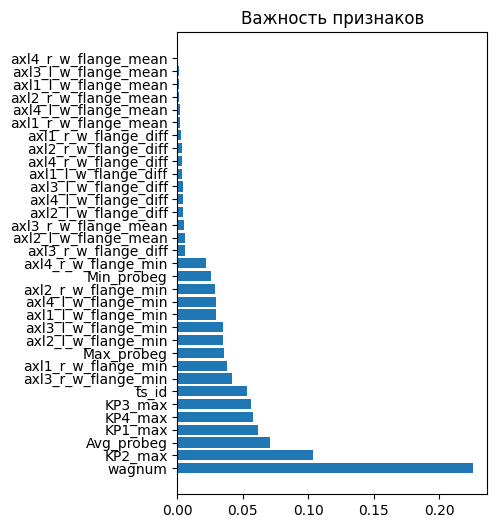

In [45]:
importance = np.sort(pipeline['regression'].feature_importances_)
importance_name = np.argsort(pipeline['regression'].feature_importances_)
feature_names = X_train.columns

plt.figure(figsize=(4, 6))
plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

# Преобразуем колонки 'a' и 'b' в полиномиальные признаки
poly_features = poly.fit_transform(merged_df[['axl1_l_w_flange_min', 'axl1_r_w_flange_min']])

pd.DataFrame(poly_features, columns=['a', 'b', 'a^2', 'ab', 'b^2'])

In [ ]:
merged_df

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_validate
clf_list = [KNeighborsRegressor(), LogisticRegression(), RandomForestRegressor(), GradientBoostingRegressor(), SVR() ]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('preprocessing', MinMaxScaler()),
                ('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=5)
    cv_list.append(cv_results['test_score'])
cv_list

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image

import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

In [ ]:

pipe = Pipeline([ ('preprocessing', MinMaxScaler()) , ('regression', KNeighborsRegressor())])

n_neighbors  = np.arange(16,18,1)
p= [1,2,5,8]
weights = ['distance','uniform']

param_grid = [
    {'preprocessing':[MinMaxScaler()],
    'regression': [KNeighborsRegressor()],
     'regression__n_neighbors': n_neighbors,
     'regression__p': p,
     'regression__weights': weights
    }
] #решетка

grid = GridSearchCV(pipe,param_grid, cv=5,
                    return_train_score = True, 
                   n_jobs = -1, scoring = 'neg_mean_absolute_error') # решетчатый поиск

# for i in tqdm([1,2,3]):
grid.fit(X_train, y_train)

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_score'], ascending = [True]).T

In [ ]:

linreg = KNeighborsRegressor(n_neighbors = 16 , p=2)
pipeline = Pipeline([('preprocessing', MinMaxScaler()),
                ('regression', linreg)])
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)
print(pipeline.score(X_train,y_train))
y_pred = linreg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(pipeline.score(X_test, y_test))

In [ ]:
table=pd.DataFrame(grid.cv_results_)
pv_table=table.pivot_table(index='param_regression__n_neighbors',columns='param_regression__p',values='mean_test_score')
pv_table
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pv_table, annot=True, linewidths=.5, ax=ax)

## Попытки обучить на панельных данных

In [ ]:
# объединенный МНК (pooled OLS) - не учитывает панельную структуру данных:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import statsmodels.stats.outliers_influence as oi

reg= sm.OLS(merged_df[['target']], merged_df.drop(['target'],  axis=1)).fit(cov_type="HC3")
result_table= summary_col(results = reg, stars = True)
print(result_table)

In [ ]:
# модели с фиксированными эффектам
from linearmodels.panel import PanelOLS
oneway_fe=merged_df.set_index(["wagnum", "ts_id"])
oneway_fe
reg_fe1 = PanelOLS(dependent=oneway_fe['target'], 
                    exog=oneway_fe.drop(['target'],  axis=1),  
                    entity_effects=True, time_effects=False, drop_absorbed=True)
reg_fe1=reg_fe1.fit(cov_type='clustered', cluster_entity=True)
reg_fe1

In [107]:
y

0        38958.0
1        57253.0
2         9734.0
3         2604.0
4        17272.0
          ...   
33007    74694.0
33008    25790.0
33009    10211.0
33010     7526.0
33011    22882.0
Name: target, Length: 33012, dtype: float64

In [132]:
test_data

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange
0,0,1,258.0,30.6,29.2,29.7,30.2,29.4,29.1,28.2,29.5
1,0,1,2905.0,30.0,28.2,29.2,29.2,28.7,28.9,28.1,29.0
2,0,1,3885.0,29.8,28.6,29.3,29.1,28.5,28.7,27.9,28.6
3,0,1,4864.0,29.7,28.4,29.3,29.1,29.1,28.5,28.2,29.0
4,0,1,6225.0,30.6,29.1,29.4,29.2,29.1,28.7,27.9,28.3
...,...,...,...,...,...,...,...,...,...,...,...
209071,37429,4,32362.0,28.2,29.4,31.3,32.2,29.0,27.8,29.1,29.4
209072,37429,4,34150.0,28.4,29.4,31.4,32.1,28.8,27.6,29.3,28.9
209073,37429,4,34150.0,28.6,29.0,30.8,32.7,28.8,27.7,29.2,28.3
209074,37429,4,35942.0,27.9,28.7,31.0,32.1,28.0,27.3,29.1,27.7


In [133]:
test_data = test_data.sort_values(['wagnum', 'ts_id', 'milleage_all']).bfill()
test_data[test_data.isna().any(axis=1)]
test_data[test_data.duplicated()]
test_data = test_data.drop_duplicates()
test_data.head(1)

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange
0,0,1,258.0,30.6,29.2,29.7,30.2,29.4,29.1,28.2,29.5


In [134]:
test_data_new = test_data.copy()
test_data_new['KP1'] = test_data_new['axl1_l_w_flange'] +test_data_new['axl1_r_w_flange']
test_data_new['KP2'] = test_data_new['axl2_l_w_flange'] +test_data_new['axl2_r_w_flange']
test_data_new['KP3'] = test_data_new['axl3_l_w_flange'] +test_data_new['axl3_r_w_flange']
test_data_new['KP4'] = test_data_new['axl4_l_w_flange'] +test_data_new['axl4_r_w_flange']

In [135]:
test_data_new

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange,KP1,KP2,KP3,KP4
0,0,1,258.0,30.6,29.2,29.7,30.2,29.4,29.1,28.2,29.5,59.8,59.9,58.5,57.7
1,0,1,2905.0,30.0,28.2,29.2,29.2,28.7,28.9,28.1,29.0,58.2,58.4,57.6,57.1
2,0,1,3885.0,29.8,28.6,29.3,29.1,28.5,28.7,27.9,28.6,58.4,58.4,57.2,56.5
3,0,1,4864.0,29.7,28.4,29.3,29.1,29.1,28.5,28.2,29.0,58.1,58.4,57.6,57.2
4,0,1,6225.0,30.6,29.1,29.4,29.2,29.1,28.7,27.9,28.3,59.7,58.6,57.8,56.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209071,37429,4,32362.0,28.2,29.4,31.3,32.2,29.0,27.8,29.1,29.4,57.6,63.5,56.8,58.5
209072,37429,4,34150.0,28.4,29.4,31.4,32.1,28.8,27.6,29.3,28.9,57.8,63.5,56.4,58.2
209073,37429,4,34150.0,28.6,29.0,30.8,32.7,28.8,27.7,29.2,28.3,57.6,63.5,56.5,57.5
209074,37429,4,35942.0,27.9,28.7,31.0,32.1,28.0,27.3,29.1,27.7,56.6,63.1,55.3,56.8


In [136]:
# def test_mean(aa):
#     res =[np.nan]
#     for i in range(1, len(aa)):
#         res.append(aa[i-1] - aa[i])
#     res_s = pd.Series(res)
#     res_s = res_s.fillna(res_s.mean())
#     return np.mean(res_s)

# def test_mean2(aa):
#     res =[np.nan]
#     for i in range(1, len(aa)):
#         res.append(aa[i] - aa[i-1])
#     res_s = pd.Series(res)
#     res_s = res_s.fillna(res_s.mean())
#     return np.mean(res_s)

grouped2 = test_data_new.groupby(['wagnum', 'ts_id']).agg(
    Max_probeg=('milleage_all', 'max'),
    Avg_probeg=('milleage_all', 'mean'),
    Min_probeg=('milleage_all', 'min'),
#     probeg_diff=('milleage_all', lambda x: x.max() - x.min()),
    axl1_l_w_flange_diff=('axl1_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl1_r_w_flange_diff=('axl1_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl2_l_w_flange_diff=('axl2_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl2_r_w_flange_diff=('axl2_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl3_l_w_flange_diff=('axl3_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl3_r_w_flange_diff=('axl3_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl4_l_w_flange_diff=('axl4_l_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl4_r_w_flange_diff=('axl4_r_w_flange', lambda x: x.iloc[0] - x.iloc[-1]),
    axl1_l_w_flange_min=('axl1_l_w_flange', 'min'),
    axl1_r_w_flange_min=('axl1_r_w_flange', 'min'),
    axl2_l_w_flange_min=('axl2_l_w_flange', 'min'),
    axl2_r_w_flange_min=('axl2_r_w_flange', 'min'),
    axl3_l_w_flange_min=('axl3_l_w_flange', 'min'),
    axl3_r_w_flange_min=('axl3_r_w_flange', 'min'),
    axl4_l_w_flange_min=('axl4_l_w_flange', 'min'),
    axl4_r_w_flange_min=('axl4_r_w_flange', 'min'),
#     axl1_l_w_flange_max=('axl1_l_w_flange', 'max'),
#     axl1_r_w_flange_max=('axl1_r_w_flange', 'max'),
#     axl2_l_w_flange_max=('axl2_l_w_flange', 'max'),
#     axl2_r_w_flange_max=('axl2_r_w_flange', 'max'),
#     axl3_l_w_flange_max=('axl3_l_w_flange', 'max'),
#     axl3_r_w_flange_max=('axl3_r_w_flange', 'max'),
#     axl4_l_w_flange_max=('axl4_l_w_flange', 'max'),
#     axl4_r_w_flange_max=('axl4_r_w_flange', 'max'),
    axl1_l_w_flange_mean=('axl1_l_w_flange', 'mean'),
    axl1_r_w_flange_mean=('axl1_r_w_flange', 'mean'),
    axl2_l_w_flange_mean=('axl2_l_w_flange', 'mean'),
    axl2_r_w_flange_mean=('axl2_r_w_flange', 'mean'),
    axl3_l_w_flange_mean=('axl3_l_w_flange', 'mean'),
    axl3_r_w_flange_mean=('axl3_r_w_flange', 'mean'),
    axl4_l_w_flange_mean=('axl4_l_w_flange', 'mean'),
    axl4_r_w_flange_mean=('axl4_r_w_flange', 'mean'),
    KP1_max = ('KP1', 'max'),
    KP2_max = ('KP2', 'max'),
    KP3_max = ('KP3', 'max'),
    KP4_max = ('KP4', 'max')
#     KP1_mean=('KP1', lambda a: test_mean(list(a))),
#     KP2_mean=('KP2', lambda a: test_mean(list(a))),
#     KP3_mean=('KP3', lambda a: test_mean(list(a))),
#     KP4_mean=('KP4', lambda a: test_mean(list(a))),
#     milleage_mean=('milleage_all', lambda a: test_mean2(list(a)))
    
)
# вывод результата

grouped2 = grouped2.reset_index()

In [137]:
grouped2

,wagnum,ts_id,Max_probeg,Avg_probeg,Min_probeg,axl1_l_w_flange_diff,axl1_r_w_flange_diff,axl2_l_w_flange_diff,axl2_r_w_flange_diff,axl3_l_w_flange_diff,...,axl2_l_w_flange_mean,axl2_r_w_flange_mean,axl3_l_w_flange_mean,axl3_r_w_flange_mean,axl4_l_w_flange_mean,axl4_r_w_flange_mean,KP1_max,KP2_max,KP3_max,KP4_max
0,0,1,28043.0,14987.263158,258.0,0.8,0.7,2.5,2.6,1.3,...,28.457895,28.484211,28.684211,28.584211,27.173684,27.915789,59.8,59.9,58.5,57.7
1,1,2,93796.0,75232.421053,56488.0,-1.3,-1.5,0.4,0.4,-0.4,...,29.042105,28.400000,29.626316,28.194737,31.705263,31.689474,58.8,58.9,59.2,65.0
2,4,1,27869.0,17879.631579,4550.0,0.8,0.7,1.1,3.6,1.1,...,30.663158,29.347368,29.205263,28.763158,27.031579,29.247368,59.3,62.6,59.6,58.6
3,7,1,25274.0,9810.000000,870.0,0.1,-0.7,-0.6,-1.0,0.5,...,29.463158,28.900000,28.631579,28.952632,29.336842,29.510526,57.6,59.7,59.6,60.4
4,13,5,74180.0,22932.684211,3174.0,1.3,1.4,0.7,3.4,1.3,...,30.521053,28.142105,28.752632,28.736842,27.400000,30.321053,58.8,61.8,59.2,60.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,37418,3,35199.0,17607.421053,2263.0,2.0,0.4,4.7,1.6,0.7,...,28.363158,30.015789,30.473684,29.231579,28.689474,31.000000,61.8,62.3,61.1,63.3
11000,37419,2,84312.0,69469.052632,56344.0,-0.2,0.5,1.0,0.1,0.1,...,29.384211,32.384211,31.236842,30.126316,29.368421,31.131579,64.1,63.1,62.3,61.1
11001,37426,1,116127.0,99423.105263,81651.0,-0.2,0.6,1.1,-0.9,1.0,...,30.242105,31.226316,28.031579,27.973684,31.073684,29.321053,57.2,62.7,57.9,61.5
11002,37428,3,31765.0,17105.842105,860.0,1.8,1.4,1.7,1.2,2.1,...,29.705263,28.415789,28.436842,29.831579,30.784211,31.047368,64.7,60.9,61.1,64.5


In [138]:
from catboost import CatBoostRegressor
# model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', random_seed=42)
# model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100)


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', CatBoostRegressor(iterations=2000, learning_rate=0.01, depth=11, loss_function='MAE', random_seed=42))
])

pipeline.fit(X,y)

y_predict = pipeline.predict(grouped2)
# pipeline.score(X_train,y_train)
# print(pipeline.score(X_train,y_train))
# y_pred = pipeline.predict(X_test)
# print(mean_absolute_error(y_test, y_pred))
# print(pipeline.score(X_test, y_test))

0:	learn: 26949.7951186	total: 133ms	remaining: 4m 26s
1:	learn: 26802.8497521	total: 259ms	remaining: 4m 19s
2:	learn: 26661.2081890	total: 386ms	remaining: 4m 16s
3:	learn: 26526.3356796	total: 510ms	remaining: 4m 14s
4:	learn: 26387.6610017	total: 627ms	remaining: 4m 10s
5:	learn: 26248.1346310	total: 745ms	remaining: 4m 7s
6:	learn: 26113.7697191	total: 861ms	remaining: 4m 5s
7:	learn: 25986.0245273	total: 978ms	remaining: 4m 3s
8:	learn: 25860.2751955	total: 1.1s	remaining: 4m 3s
9:	learn: 25728.9412703	total: 1.22s	remaining: 4m 2s
10:	learn: 25602.5508019	total: 1.34s	remaining: 4m 2s
11:	learn: 25479.7215202	total: 1.46s	remaining: 4m 2s
12:	learn: 25355.3745247	total: 1.59s	remaining: 4m 2s
13:	learn: 25234.5907290	total: 1.71s	remaining: 4m 2s
14:	learn: 25110.1331515	total: 1.83s	remaining: 4m 2s
15:	learn: 24995.8033071	total: 1.97s	remaining: 4m 4s
16:	learn: 24888.9099256	total: 2.12s	remaining: 4m 6s
17:	learn: 24770.4221335	total: 2.25s	remaining: 4m 8s
18:	learn: 24658

150:	learn: 18190.2222554	total: 18.7s	remaining: 3m 49s
151:	learn: 18171.6811948	total: 18.9s	remaining: 3m 49s
152:	learn: 18152.2636402	total: 19s	remaining: 3m 49s
153:	learn: 18131.8701929	total: 19.1s	remaining: 3m 49s
154:	learn: 18115.6374484	total: 19.2s	remaining: 3m 48s
155:	learn: 18102.1274586	total: 19.4s	remaining: 3m 48s
156:	learn: 18086.4013303	total: 19.5s	remaining: 3m 48s
157:	learn: 18071.7593539	total: 19.6s	remaining: 3m 48s
158:	learn: 18054.5764645	total: 19.7s	remaining: 3m 48s
159:	learn: 18038.6895081	total: 19.8s	remaining: 3m 48s
160:	learn: 18024.5375870	total: 20s	remaining: 3m 48s
161:	learn: 18010.4350257	total: 20.1s	remaining: 3m 47s
162:	learn: 17994.8498483	total: 20.2s	remaining: 3m 47s
163:	learn: 17980.1851788	total: 20.3s	remaining: 3m 47s
164:	learn: 17963.9391651	total: 20.5s	remaining: 3m 47s
165:	learn: 17949.3452540	total: 20.6s	remaining: 3m 47s
166:	learn: 17934.6651529	total: 20.7s	remaining: 3m 47s
167:	learn: 17918.2921046	total: 20

296:	learn: 16805.8356058	total: 36.7s	remaining: 3m 30s
297:	learn: 16800.4870587	total: 36.8s	remaining: 3m 30s
298:	learn: 16796.5106151	total: 36.9s	remaining: 3m 30s
299:	learn: 16792.2107549	total: 37.1s	remaining: 3m 30s
300:	learn: 16788.3935524	total: 37.2s	remaining: 3m 30s
301:	learn: 16783.4207423	total: 37.3s	remaining: 3m 29s
302:	learn: 16779.8678205	total: 37.5s	remaining: 3m 29s
303:	learn: 16773.9852378	total: 37.6s	remaining: 3m 29s
304:	learn: 16770.0273225	total: 37.8s	remaining: 3m 29s
305:	learn: 16760.9652857	total: 37.9s	remaining: 3m 29s
306:	learn: 16755.5986462	total: 38s	remaining: 3m 29s
307:	learn: 16751.8923465	total: 38.2s	remaining: 3m 29s
308:	learn: 16747.0967673	total: 38.3s	remaining: 3m 29s
309:	learn: 16742.2262571	total: 38.4s	remaining: 3m 29s
310:	learn: 16734.5230627	total: 38.6s	remaining: 3m 29s
311:	learn: 16729.6284927	total: 38.7s	remaining: 3m 29s
312:	learn: 16726.1657127	total: 38.8s	remaining: 3m 29s
313:	learn: 16721.8275010	total: 

442:	learn: 16199.1806297	total: 54.9s	remaining: 3m 12s
443:	learn: 16196.3676540	total: 55s	remaining: 3m 12s
444:	learn: 16193.1922754	total: 55.1s	remaining: 3m 12s
445:	learn: 16188.3519540	total: 55.2s	remaining: 3m 12s
446:	learn: 16186.6100765	total: 55.4s	remaining: 3m 12s
447:	learn: 16180.1388394	total: 55.5s	remaining: 3m 12s
448:	learn: 16177.7962423	total: 55.6s	remaining: 3m 12s
449:	learn: 16171.4244871	total: 55.7s	remaining: 3m 12s
450:	learn: 16167.4207678	total: 55.9s	remaining: 3m 11s
451:	learn: 16162.6364581	total: 56s	remaining: 3m 11s
452:	learn: 16159.4904667	total: 56.1s	remaining: 3m 11s
453:	learn: 16157.6827121	total: 56.2s	remaining: 3m 11s
454:	learn: 16154.5293714	total: 56.4s	remaining: 3m 11s
455:	learn: 16150.8008177	total: 56.5s	remaining: 3m 11s
456:	learn: 16146.8119914	total: 56.6s	remaining: 3m 11s
457:	learn: 16142.1028610	total: 56.7s	remaining: 3m 11s
458:	learn: 16138.8955395	total: 56.9s	remaining: 3m 10s
459:	learn: 16133.6857002	total: 57

588:	learn: 15711.5043737	total: 1m 12s	remaining: 2m 54s
589:	learn: 15709.1724763	total: 1m 13s	remaining: 2m 54s
590:	learn: 15707.3100327	total: 1m 13s	remaining: 2m 54s
591:	learn: 15702.5581365	total: 1m 13s	remaining: 2m 54s
592:	learn: 15700.4836125	total: 1m 13s	remaining: 2m 54s
593:	learn: 15698.5880806	total: 1m 13s	remaining: 2m 54s
594:	learn: 15697.2085884	total: 1m 13s	remaining: 2m 53s
595:	learn: 15694.6208686	total: 1m 13s	remaining: 2m 53s
596:	learn: 15691.8570428	total: 1m 13s	remaining: 2m 53s
597:	learn: 15688.9852844	total: 1m 14s	remaining: 2m 53s
598:	learn: 15684.6256831	total: 1m 14s	remaining: 2m 53s
599:	learn: 15682.1873430	total: 1m 14s	remaining: 2m 53s
600:	learn: 15680.3754691	total: 1m 14s	remaining: 2m 53s
601:	learn: 15675.1314620	total: 1m 14s	remaining: 2m 52s
602:	learn: 15671.5180662	total: 1m 14s	remaining: 2m 52s
603:	learn: 15667.2536982	total: 1m 14s	remaining: 2m 52s
604:	learn: 15659.2742408	total: 1m 14s	remaining: 2m 52s
605:	learn: 15

730:	learn: 15322.4154578	total: 1m 31s	remaining: 2m 38s
731:	learn: 15320.8640021	total: 1m 31s	remaining: 2m 38s
732:	learn: 15319.0320180	total: 1m 31s	remaining: 2m 37s
733:	learn: 15315.6343835	total: 1m 31s	remaining: 2m 37s
734:	learn: 15313.9171292	total: 1m 31s	remaining: 2m 37s
735:	learn: 15311.7657721	total: 1m 31s	remaining: 2m 37s
736:	learn: 15309.6859336	total: 1m 31s	remaining: 2m 37s
737:	learn: 15308.1367892	total: 1m 32s	remaining: 2m 37s
738:	learn: 15306.4487946	total: 1m 32s	remaining: 2m 37s
739:	learn: 15305.0004629	total: 1m 32s	remaining: 2m 37s
740:	learn: 15303.0921529	total: 1m 32s	remaining: 2m 37s
741:	learn: 15301.4985993	total: 1m 32s	remaining: 2m 37s
742:	learn: 15299.5317120	total: 1m 32s	remaining: 2m 36s
743:	learn: 15295.9790227	total: 1m 32s	remaining: 2m 36s
744:	learn: 15294.7428911	total: 1m 33s	remaining: 2m 36s
745:	learn: 15290.9000934	total: 1m 33s	remaining: 2m 36s
746:	learn: 15287.9223678	total: 1m 33s	remaining: 2m 36s
747:	learn: 15

872:	learn: 14936.4703808	total: 1m 50s	remaining: 2m 23s
873:	learn: 14932.1567157	total: 1m 50s	remaining: 2m 22s
874:	learn: 14929.4147369	total: 1m 51s	remaining: 2m 22s
875:	learn: 14927.3436209	total: 1m 51s	remaining: 2m 22s
876:	learn: 14923.4481663	total: 1m 51s	remaining: 2m 22s
877:	learn: 14921.8086492	total: 1m 51s	remaining: 2m 22s
878:	learn: 14919.6583091	total: 1m 51s	remaining: 2m 22s
879:	learn: 14917.8700683	total: 1m 51s	remaining: 2m 22s
880:	learn: 14915.5882036	total: 1m 51s	remaining: 2m 22s
881:	learn: 14914.3677559	total: 1m 51s	remaining: 2m 21s
882:	learn: 14911.2460222	total: 1m 52s	remaining: 2m 21s
883:	learn: 14908.7327854	total: 1m 52s	remaining: 2m 21s
884:	learn: 14906.7142826	total: 1m 52s	remaining: 2m 21s
885:	learn: 14903.6939869	total: 1m 52s	remaining: 2m 21s
886:	learn: 14901.4708749	total: 1m 52s	remaining: 2m 21s
887:	learn: 14900.2037123	total: 1m 52s	remaining: 2m 21s
888:	learn: 14895.8038733	total: 1m 52s	remaining: 2m 21s
889:	learn: 14

1016:	learn: 14535.3335545	total: 2m 8s	remaining: 2m 4s
1017:	learn: 14531.5016220	total: 2m 8s	remaining: 2m 4s
1018:	learn: 14529.9347979	total: 2m 8s	remaining: 2m 4s
1019:	learn: 14526.2925713	total: 2m 9s	remaining: 2m 4s
1020:	learn: 14524.8008259	total: 2m 9s	remaining: 2m 3s
1021:	learn: 14523.6436695	total: 2m 9s	remaining: 2m 3s
1022:	learn: 14520.1445157	total: 2m 9s	remaining: 2m 3s
1023:	learn: 14518.6896367	total: 2m 9s	remaining: 2m 3s
1024:	learn: 14517.4508547	total: 2m 9s	remaining: 2m 3s
1025:	learn: 14512.9530115	total: 2m 9s	remaining: 2m 3s
1026:	learn: 14511.3512617	total: 2m 9s	remaining: 2m 3s
1027:	learn: 14510.2702620	total: 2m 10s	remaining: 2m 2s
1028:	learn: 14507.3417519	total: 2m 10s	remaining: 2m 2s
1029:	learn: 14504.3391201	total: 2m 10s	remaining: 2m 2s
1030:	learn: 14502.7777379	total: 2m 10s	remaining: 2m 2s
1031:	learn: 14500.0887248	total: 2m 10s	remaining: 2m 2s
1032:	learn: 14497.8519511	total: 2m 10s	remaining: 2m 2s
1033:	learn: 14494.256281

1158:	learn: 14187.3193225	total: 2m 26s	remaining: 1m 46s
1159:	learn: 14184.1741311	total: 2m 26s	remaining: 1m 45s
1160:	learn: 14180.3245392	total: 2m 26s	remaining: 1m 45s
1161:	learn: 14178.6070926	total: 2m 26s	remaining: 1m 45s
1162:	learn: 14176.7539145	total: 2m 26s	remaining: 1m 45s
1163:	learn: 14173.2464745	total: 2m 26s	remaining: 1m 45s
1164:	learn: 14167.7023578	total: 2m 26s	remaining: 1m 45s
1165:	learn: 14167.1219563	total: 2m 26s	remaining: 1m 45s
1166:	learn: 14163.7431336	total: 2m 27s	remaining: 1m 45s
1167:	learn: 14162.5387309	total: 2m 27s	remaining: 1m 44s
1168:	learn: 14161.1977291	total: 2m 27s	remaining: 1m 44s
1169:	learn: 14158.8948507	total: 2m 27s	remaining: 1m 44s
1170:	learn: 14155.5498921	total: 2m 27s	remaining: 1m 44s
1171:	learn: 14153.1096956	total: 2m 27s	remaining: 1m 44s
1172:	learn: 14151.6183958	total: 2m 27s	remaining: 1m 44s
1173:	learn: 14150.2548038	total: 2m 27s	remaining: 1m 44s
1174:	learn: 14146.3337947	total: 2m 28s	remaining: 1m 4

1298:	learn: 13878.0234551	total: 2m 44s	remaining: 1m 28s
1299:	learn: 13876.6024063	total: 2m 44s	remaining: 1m 28s
1300:	learn: 13874.1804864	total: 2m 44s	remaining: 1m 28s
1301:	learn: 13873.5497120	total: 2m 44s	remaining: 1m 28s
1302:	learn: 13872.0997603	total: 2m 44s	remaining: 1m 28s
1303:	learn: 13869.7057141	total: 2m 44s	remaining: 1m 27s
1304:	learn: 13867.7399479	total: 2m 44s	remaining: 1m 27s
1305:	learn: 13865.0852291	total: 2m 44s	remaining: 1m 27s
1306:	learn: 13863.9081540	total: 2m 45s	remaining: 1m 27s
1307:	learn: 13862.6574101	total: 2m 45s	remaining: 1m 27s
1308:	learn: 13859.6811806	total: 2m 45s	remaining: 1m 27s
1309:	learn: 13855.6452404	total: 2m 45s	remaining: 1m 27s
1310:	learn: 13854.6155488	total: 2m 45s	remaining: 1m 27s
1311:	learn: 13852.9309795	total: 2m 45s	remaining: 1m 26s
1312:	learn: 13850.5019396	total: 2m 45s	remaining: 1m 26s
1313:	learn: 13848.5975175	total: 2m 46s	remaining: 1m 26s
1314:	learn: 13846.9589345	total: 2m 46s	remaining: 1m 2

1438:	learn: 13597.2188716	total: 3m 2s	remaining: 1m 11s
1439:	learn: 13594.8051245	total: 3m 2s	remaining: 1m 11s
1440:	learn: 13593.2058372	total: 3m 2s	remaining: 1m 10s
1441:	learn: 13591.8649189	total: 3m 2s	remaining: 1m 10s
1442:	learn: 13590.8893898	total: 3m 3s	remaining: 1m 10s
1443:	learn: 13590.0199322	total: 3m 3s	remaining: 1m 10s
1444:	learn: 13586.9631044	total: 3m 3s	remaining: 1m 10s
1445:	learn: 13583.5329667	total: 3m 3s	remaining: 1m 10s
1446:	learn: 13582.2997395	total: 3m 3s	remaining: 1m 10s
1447:	learn: 13581.2981874	total: 3m 3s	remaining: 1m 10s
1448:	learn: 13577.0220179	total: 3m 3s	remaining: 1m 9s
1449:	learn: 13576.0938488	total: 3m 3s	remaining: 1m 9s
1450:	learn: 13572.7461062	total: 3m 4s	remaining: 1m 9s
1451:	learn: 13571.8391367	total: 3m 4s	remaining: 1m 9s
1452:	learn: 13568.6643290	total: 3m 4s	remaining: 1m 9s
1453:	learn: 13564.3013650	total: 3m 4s	remaining: 1m 9s
1454:	learn: 13563.2564267	total: 3m 4s	remaining: 1m 9s
1455:	learn: 13562.97

1582:	learn: 13310.3699082	total: 3m 20s	remaining: 52.8s
1583:	learn: 13310.0353939	total: 3m 20s	remaining: 52.7s
1584:	learn: 13306.5471137	total: 3m 20s	remaining: 52.5s
1585:	learn: 13306.0609973	total: 3m 20s	remaining: 52.4s
1586:	learn: 13302.8933397	total: 3m 20s	remaining: 52.3s
1587:	learn: 13301.6315843	total: 3m 20s	remaining: 52.1s
1588:	learn: 13299.3754980	total: 3m 21s	remaining: 52s
1589:	learn: 13295.8267739	total: 3m 21s	remaining: 51.9s
1590:	learn: 13294.1434117	total: 3m 21s	remaining: 51.8s
1591:	learn: 13291.3661810	total: 3m 21s	remaining: 51.6s
1592:	learn: 13289.8002496	total: 3m 21s	remaining: 51.5s
1593:	learn: 13288.6741941	total: 3m 21s	remaining: 51.4s
1594:	learn: 13286.3905692	total: 3m 21s	remaining: 51.3s
1595:	learn: 13284.3678524	total: 3m 22s	remaining: 51.1s
1596:	learn: 13280.0645425	total: 3m 22s	remaining: 51s
1597:	learn: 13275.0182802	total: 3m 22s	remaining: 50.9s
1598:	learn: 13273.3596677	total: 3m 22s	remaining: 50.7s
1599:	learn: 13270

1724:	learn: 13078.2194772	total: 3m 37s	remaining: 34.7s
1725:	learn: 13077.4440430	total: 3m 37s	remaining: 34.6s
1726:	learn: 13075.0167018	total: 3m 37s	remaining: 34.4s
1727:	learn: 13073.6544643	total: 3m 38s	remaining: 34.3s
1728:	learn: 13072.6944299	total: 3m 38s	remaining: 34.2s
1729:	learn: 13072.3921002	total: 3m 38s	remaining: 34.1s
1730:	learn: 13069.3353658	total: 3m 38s	remaining: 33.9s
1731:	learn: 13068.9885378	total: 3m 38s	remaining: 33.8s
1732:	learn: 13067.0898019	total: 3m 38s	remaining: 33.7s
1733:	learn: 13065.8702078	total: 3m 38s	remaining: 33.5s
1734:	learn: 13064.4976197	total: 3m 38s	remaining: 33.4s
1735:	learn: 13064.2279837	total: 3m 38s	remaining: 33.3s
1736:	learn: 13063.7668167	total: 3m 39s	remaining: 33.2s
1737:	learn: 13060.4419233	total: 3m 39s	remaining: 33s
1738:	learn: 13056.9172528	total: 3m 39s	remaining: 32.9s
1739:	learn: 13056.3138137	total: 3m 39s	remaining: 32.8s
1740:	learn: 13054.4178682	total: 3m 39s	remaining: 32.7s
1741:	learn: 130

1866:	learn: 12874.1461179	total: 3m 54s	remaining: 16.7s
1867:	learn: 12873.0897025	total: 3m 54s	remaining: 16.6s
1868:	learn: 12872.1704307	total: 3m 54s	remaining: 16.5s
1869:	learn: 12870.4651610	total: 3m 54s	remaining: 16.3s
1870:	learn: 12869.6158569	total: 3m 55s	remaining: 16.2s
1871:	learn: 12868.6207957	total: 3m 55s	remaining: 16.1s
1872:	learn: 12866.9109296	total: 3m 55s	remaining: 16s
1873:	learn: 12866.3881266	total: 3m 55s	remaining: 15.8s
1874:	learn: 12863.8081286	total: 3m 55s	remaining: 15.7s
1875:	learn: 12862.7778263	total: 3m 55s	remaining: 15.6s
1876:	learn: 12859.8441887	total: 3m 55s	remaining: 15.4s
1877:	learn: 12859.2562045	total: 3m 55s	remaining: 15.3s
1878:	learn: 12857.4084560	total: 3m 55s	remaining: 15.2s
1879:	learn: 12856.7052885	total: 3m 56s	remaining: 15.1s
1880:	learn: 12855.7032206	total: 3m 56s	remaining: 14.9s
1881:	learn: 12854.4817384	total: 3m 56s	remaining: 14.8s
1882:	learn: 12852.3955167	total: 3m 56s	remaining: 14.7s
1883:	learn: 128

In [139]:
y_predict

array([21505.85020417, 36101.65100716, 14575.43214657, ...,
       37023.96141734, 65414.59183612, 63223.71158346])

In [140]:
len(y_predict)

11004

In [123]:
test_data[test_data['wagnum']==0]

,wagnum,ts_id,milleage_all,axl1_l_w_flange,axl1_r_w_flange,axl2_l_w_flange,axl2_r_w_flange,axl3_l_w_flange,axl3_r_w_flange,axl4_l_w_flange,axl4_r_w_flange


In [147]:
test_submiit_example = test_submit_example.drop(['target'],axis=1)

In [148]:
test_submit_example['target'] = y_predict

In [149]:
test_submit_example

,wagnum,ts_id,target
0,0,1,21505.850204
1,1,2,36101.651007
2,4,1,14575.432147
3,7,1,43803.325736
4,13,5,14608.148012
...,...,...,...
10999,37418,3,19173.125304
11000,37419,2,68479.990661
11001,37426,1,37023.961417
11002,37428,3,65414.591836


In [152]:
test_submit_example.to_csv('Iriski.csv',index=False)